In [1]:
# Load packages
install.packages("midr")
library(midr)
library(tidyverse)
library(igraph)
library(quantmod)

# Set options for graphics
theme_set(theme_midr("y", base_size = 16))
figsize <- function(width, height) options(repr.plot.width = width, repr.plot.height = height)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘igraph’




The following objects are masked from ‘package:lubridate’:

    %--%, union




The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union




The following objects are masked from ‘package:purrr’:

    compose, simplify




The following object is masked from ‘package:tidyr’:

    crossing




The following object is masked from ‘package:tibble’:

    as_data_frame




The following objects are masked from ‘package:stats’:

    decompose, spectrum




The following object is masked from ‘package:base’:

    union




Loading required package: xts



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by R's namespace mechanism #
# Set `options(xts.warn_dplyr_breaks_lag = FALSE)` to suppress this warning.  #
#                                      


Attaching package: ‘xts’




The following objects are masked from ‘package:dplyr’:

    first, last




Loading required package: TTR



Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# Overview

This notebook performs an initial Exploratory Data Analysis (EDA) of the datasets for the Mitsui & Co. Commodity Prediction Challenge with **R**.

- Version 10 adds an **Appendix: Public Data Sources** demonstrating how to obtain historical prices from public sources (e.g., *Yahoo Finance*), and compare them with `train.cv` to map `date_id` to real world dates, using the **quantmod** package in R.

# Historical Prices

The `train.csv` and `test.csv` contain 558 and 559 columns, respectively. The first column is `date_id`, a time-series identifier, and the last column of `test.csv` is `is_scored`. The remaining 557 columns represent **historical price features** from four main categories: **LME**, **JPX**, **US Stock** and **Forex**.

---
**Category 1: London Metal Exchange (LME)**  
Official Website: [lme.com](https://www.lme.com/)

This category includes 4 columns representing the closing prices of four industrial metals:
- AH ([Alminium](https://www.lme.com/en/Metals/Non-ferrous/LME-Aluminium#Price+graphs))
- CA ([Copper](https://www.lme.com/Metals/Non-ferrous/LME-Copper#Price+graphs))
- PB ([Lead](https://www.lme.com/en/Metals/Non-ferrous/LME-Lead#Price+graphs))
- ZS ([Zinc](https://www.lme.com/en/Metals/Non-ferrous/LME-Zinc#Price+graphs))
---  
**Category 2: Japan Exchange Group (JPX)**  
Official Website: jpx.co.jp ([English](https://www.jpx.co.jp/english/index.html), [Japanese](https://www.jpx.co.jp/index.html))

This category consists of 40 columns covering six commodity-related futures:

  - [Gold Mini Futures](https://www.jpx.co.jp/english/derivatives/products/precious-metals/gold-mini-futures/index.html) ([金ミニ先物](https://www.jpx.co.jp/derivatives/products/precious-metals/gold-mini-futures/index.html))
  - [Gold Rolling Spot Futures](https://www.jpx.co.jp/english/derivatives/products/precious-metals/gold-rolling-spot-futures/index.html) ([金限日先物](https://www.jpx.co.jp/derivatives/products/precious-metals/gold-rolling-spot-futures/index.html))
  - [Gold Standard Futures](https://www.jpx.co.jp/english/derivatives/products/precious-metals/gold-standard-futures/index.html) ([金標準先物](https://www.jpx.co.jp/derivatives/products/precious-metals/gold-standard-futures/index.html))
  - [Platinum Mini Futures](https://www.jpx.co.jp/english/derivatives/products/precious-metals/platinum-mini-futures/index.html) ([白金ミニ先物](https://www.jpx.co.jp/derivatives/products/precious-metals/platinum-mini-futures/index.html))
  - [Platinum Standard Futures](https://www.jpx.co.jp/english/derivatives/products/precious-metals/platinum-standard-futures/index.html) ([白金標準先物](https://www.jpx.co.jp/derivatives/products/precious-metals/platinum-standard-futures/index.html))
  - [RSS3 Rubber Futures](https://www.jpx.co.jp/english/derivatives/products/rubber/rss3-rubber-futures/index.html) ([ゴム（RSS3）先物](https://www.jpx.co.jp/derivatives/products/rubber/rss3-rubber-futures/index.html))

For each future, the dataset includes features such as Open, High, Low, Close, Volume, Settlement Price, and Open Interest.

---
**Category 3: US Stocks**  
Official Exchanges: [nyse.com](https://www.nyse.com/index) (NYSE), [nasdaq.com](https://www.nasdaq.com/) (NASDAQ)

This category contains 475 columns for 95 selected stocks and ETFs that are closely related to commodity prices, e.g.:

- Stock
  - PAAS ([Pan American Silver Corp. Common Stock](https://www.nasdaq.com/market-activity/stocks/paas))
  - NEM ([Newmont Corporation](https://www.nyse.com/quote/XNYS:NEM))
  - GOLD ([Barrick Gold Corporation](https://www.nyse.com/quote/XNYS:GOLD))
  - SLB ([SLB (Schlumberger Limited)](https://www.nyse.com/quote/XNYS:SLB))
  - ALB ([Albemarle Corporation](https://www.nyse.com/quote/XNYS:ALB))
- ETF
  - GLD ([SPDR GOLD TRUST GOLD SHARES NPV](https://www.nyse.com/quote/ARCX:GLD))
  - IAU ([ISHARES GOLD TRUST ISHARES NEW (POST REV SPLIT)](https://www.nyse.com/quote/ARCX:IAU))
  - SLV ([ISHARES SILVER TRUST ISHARES](https://www.nyse.com/quote/ARCX:SLV))
  - URA ([GLOBAL X FDS URANIUM ETF USD](https://www.nyse.com/quote/ARCX:URA))
  - OIH ([VanEck Oil Services ETF](https://www.nyse.com/quote/ARCX:OIH))

For each ticker, the dataset contains 5 features: adjusted Open, High, Low, Close, and Volume.

---
**Source 4: Foreign Exchange (Forex)**

This category includes 38 columns representing foreign exchange rates among 10 major currencies:

- CAD ([Canadian dollar](https://en.wikipedia.org/wiki/Canadian_dollar))
- CHF ([Swiss franc](https://en.wikipedia.org/wiki/Swiss_franc))
- EUR ([Euro](https://en.wikipedia.org/wiki/Euro))
- GBP ([Pound Sterling](https://en.wikipedia.org/wiki/Sterling_(currency)))
- NZD ([New Zealand dollar](https://en.wikipedia.org/wiki/New_Zealand_dollar))
- USD ([United States dollar](https://en.wikipedia.org/wiki/United_States_dollar))
- ZAR ([South African rand](https://en.wikipedia.org/wiki/South_African_rand))
- NOK ([Norwegian krone](https://en.wikipedia.org/wiki/Norwegian_krone))
- JPY ([Japanese yen](https://en.wikipedia.org/wiki/Japanese_yen))


First, we load the datasets for the competition.

In [2]:
# Read csv files
train  <- read.csv("/kaggle/input/mitsui-commodity-prediction-challenge/train.csv")
test   <- read.csv("/kaggle/input/mitsui-commodity-prediction-challenge/test.csv")
pairs  <- read.csv("/kaggle/input/mitsui-commodity-prediction-challenge/target_pairs.csv")
labels <- read.csv("/kaggle/input/mitsui-commodity-prediction-challenge/train_labels.csv")

To better understand the structure of the data, we'll parse the column names into a structured data frame. This `train_info` table will contain the Category, Ticker, and Type for each column.

In [3]:
# Create dataframe of column info
train_names <- (
  names(train) |>
  str_replace("open_interest", "open interest") |>
  str_replace("settlement_price", "settlement price") |>
  str_replace("US_Stock", "US Stock") |>
  str_replace("adj_", "adjusted ") |>
  str_split("_")
)

train_info <- data.frame(
  Column_Id = 1L:length(train_names),
  Column = names(train),
  Category = sapply(train_names, function(x) x[1L]),
  Ticker = sapply(train_names, function(x) paste0(x[seq_len(length(x) - 2L) + 1L], collapse = "_")),
  Type = sapply(train_names, function(x) x[length(x)])
) |> mutate(
  Ticker = if_else(Ticker == "", Type, Ticker)
)

In [4]:
train_info[2L:nrow(train_info), ] |>
　group_by(Category) |>
　summarise(
    Columns_Count = n(),
    Tickers_Count = length(unique(Ticker))
 )

Category Columns_Count Tickers_Count
1 FX        38           38           
2 JPX       40            6           
3 LME        4            4           
4 US Stock 475           95

## LME Closing Prices

Let's begin a simple EDA by visualizing the closing prices for the four LME industrial metals.

In [5]:
lme_info <- train_info |>
  filter(Category == "LME")
lme_info

Column_Id Column       Category Ticker Type 
1 2         LME_AH_Close LME      AH     Close
2 3         LME_CA_Close LME      CA     Close
3 4         LME_PB_Close LME      PB     Close
4 5         LME_ZS_Close LME      ZS     Close

The plot reveals that Copper (CA) has a significantly different price scale compared to the other three metals.

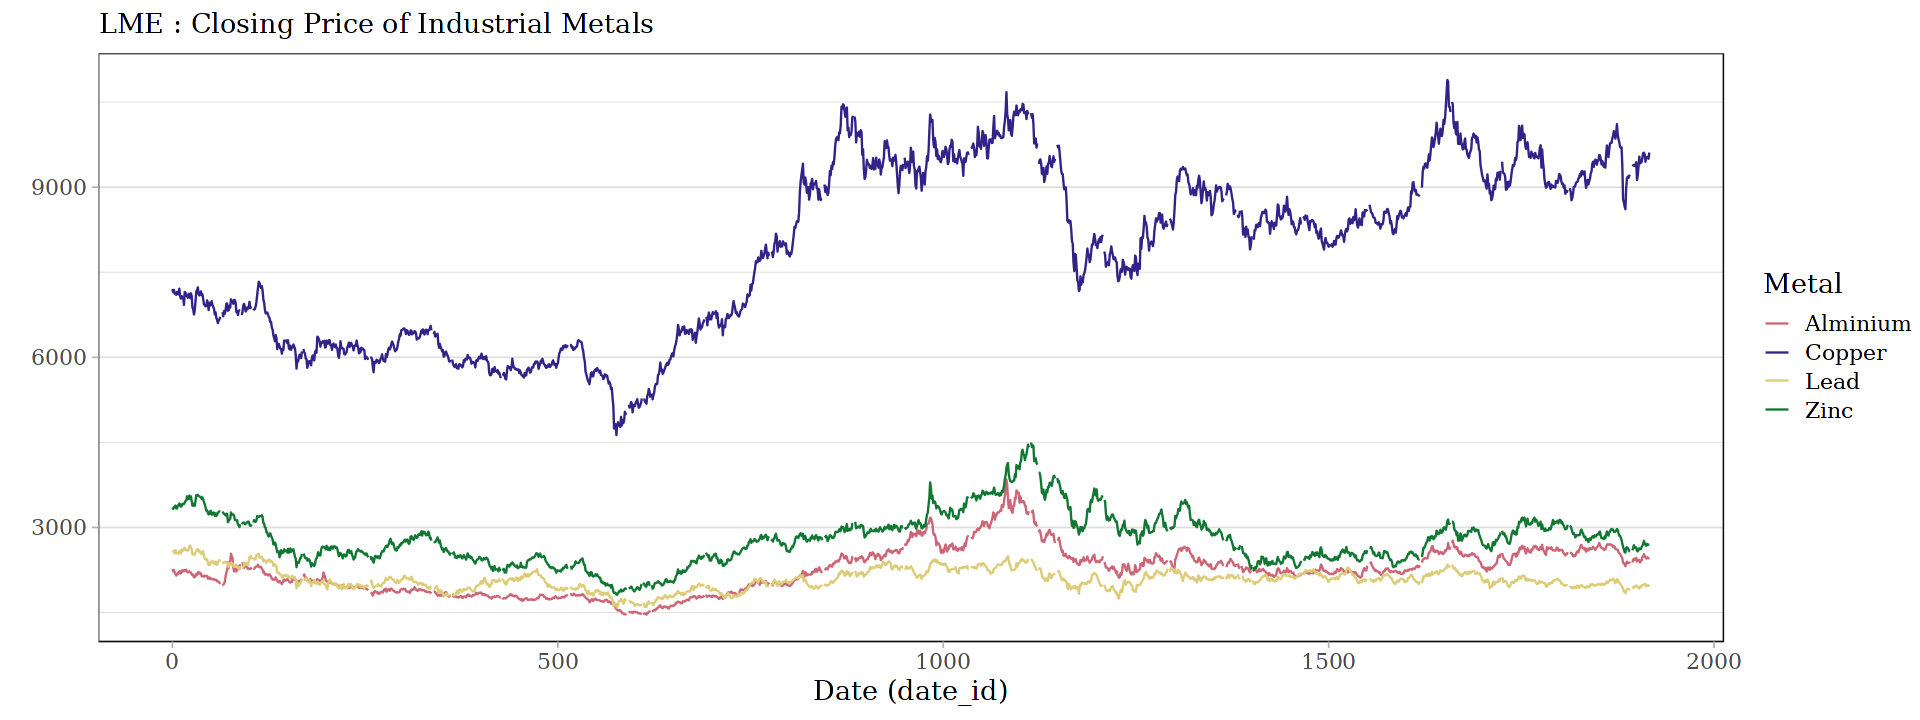

In [6]:
lme_long <- train[, 1L:5L] |>
  structure(
    names = c("date_id", "Alminium", "Copper", "Lead", "Zinc")
  ) |>
  pivot_longer(
    cols = - date_id,
    names_to = "Metal",
    values_to = "Price"
  )

figsize(16, 6)
ggplot(lme_long) +
  geom_line(aes(x = date_id, y = Price, color = Metal)) +
  labs(
    subtitle = "LME : Closing Price of Industrial Metals",
    x = "Date (date_id)", y = ""
  ) +
  scale_color_theme("muted")

## JPX Futures Closing Prices

Next, we'll examine the closing prices of the six commodity futures from JPX. To compare them on a similar scale, we use faceting to give each future its own panel.

In [7]:
jpx_info <- train_info |>
  filter(Category == "JPX", Type == "Close")
jpx_info

Column_Id Column                              Category
1 24        JPX_Gold_Mini_Futures_Close         JPX     
2 25        JPX_Gold_Rolling.Spot_Futures_Close JPX     
3 26        JPX_Gold_Standard_Futures_Close     JPX     
4 27        JPX_Platinum_Mini_Futures_Close     JPX     
5 28        JPX_Platinum_Standard_Futures_Close JPX     
6 29        JPX_RSS3_Rubber_Futures_Close       JPX     
  Ticker                    Type 
1 Gold_Mini_Futures         Close
2 Gold_Rolling.Spot_Futures Close
3 Gold_Standard_Futures     Close
4 Platinum_Mini_Futures     Close
5 Platinum_Standard_Futures Close
6 RSS3_Rubber_Futures       Close

The plots show diverse trends across different commodity futures, with Gold and Platinum contracts exhibiting distinct patterns.

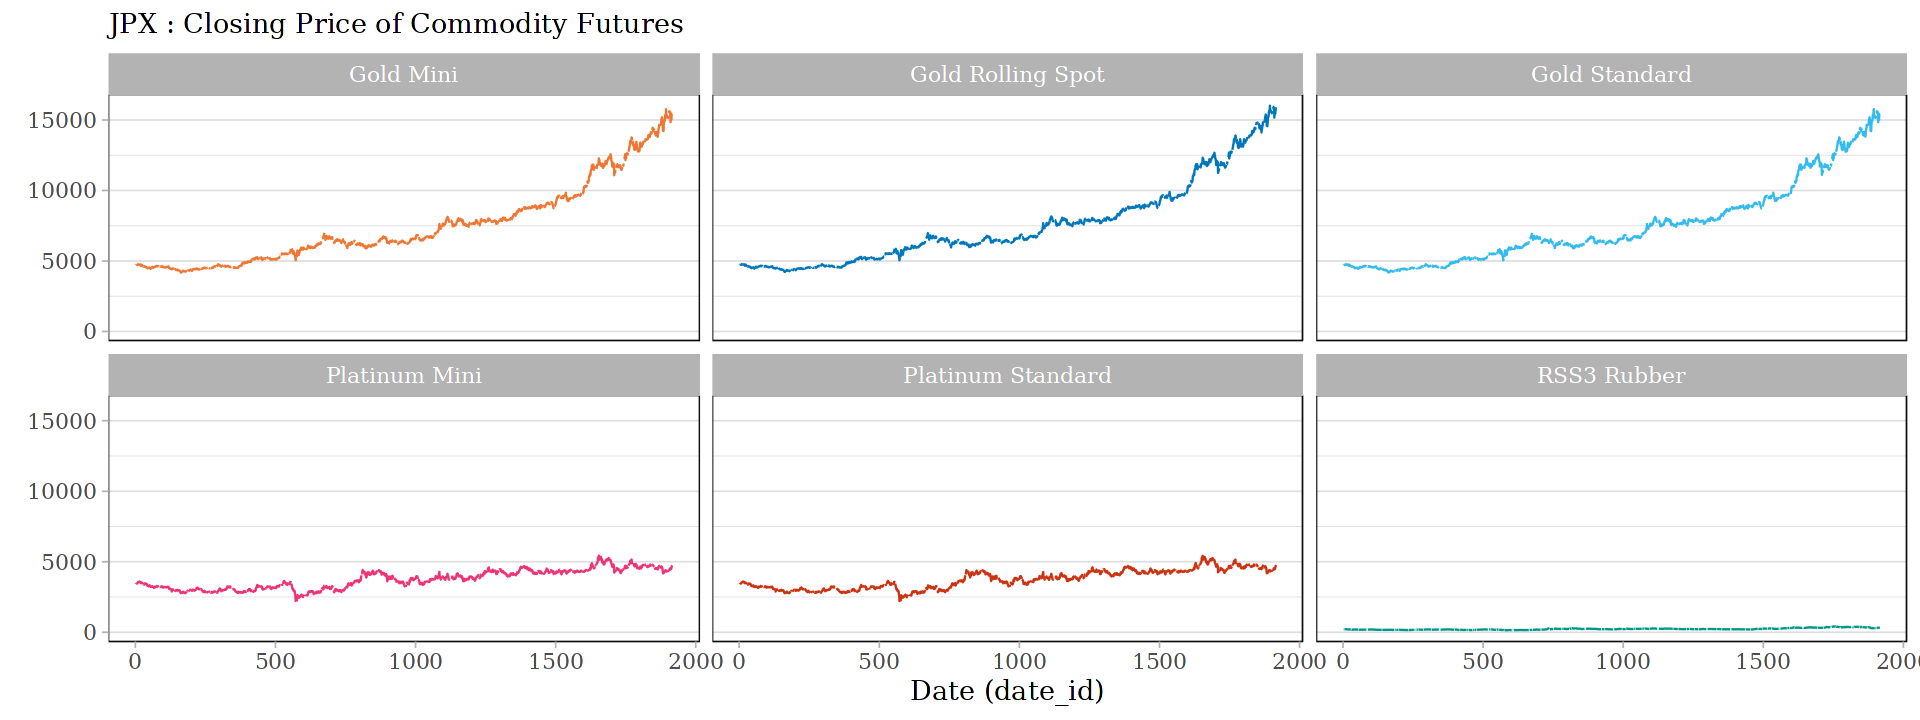

In [8]:
jpx_long <- train[, c(1L, jpx_info$Column_Id)] |>
  structure(
    names = c("date_id", "Gold Mini", "Gold Rolling Spot", "Gold Standard",
              "Platinum Mini", "Platinum Standard", "RSS3 Rubber")
  ) |>
  pivot_longer(
    cols = - date_id,
    names_to = "Futures",
    values_to = "Price"
  )

figsize(16, 6)
gg <- ggplot(jpx_long) +
  geom_line(aes(x = date_id, y = Price, color = Futures)) +
  labs(
    subtitle = "JPX : Closing Price of Commodity Futures",
    x = "Date (date_id)", y = ""
  ) +
  scale_color_theme("vibrant") +
  facet_wrap(~ Futures, ncol = 3L) +
  theme(legend.position = "none")
suppressWarnings(plot(gg))

## US Stock Adjusted Closing Prices

Now, let's look at the 95 US stocks and ETFs. We will again use faceting to observe individual price series.

In [9]:
uss_info <- train_info |> filter(Category == "US Stock", Type == "adjusted close")
uss_tickers <- uss_info[["Ticker"]]
uss_info |> head()

Column_Id Column                  Category Ticker Type          
1 331       US_Stock_ACWI_adj_close US Stock ACWI   adjusted close
2 332       US_Stock_AEM_adj_close  US Stock AEM    adjusted close
3 333       US_Stock_AG_adj_close   US Stock AG     adjusted close
4 334       US_Stock_AGG_adj_close  US Stock AGG    adjusted close
5 335       US_Stock_ALB_adj_close  US Stock ALB    adjusted close
6 336       US_Stock_AMP_adj_close  US Stock AMP    adjusted close

*Note: The y-axis is limited to a range of 0-150 to improve readability for the majority of tickers. This may hide the full range of higher-priced tickers.*

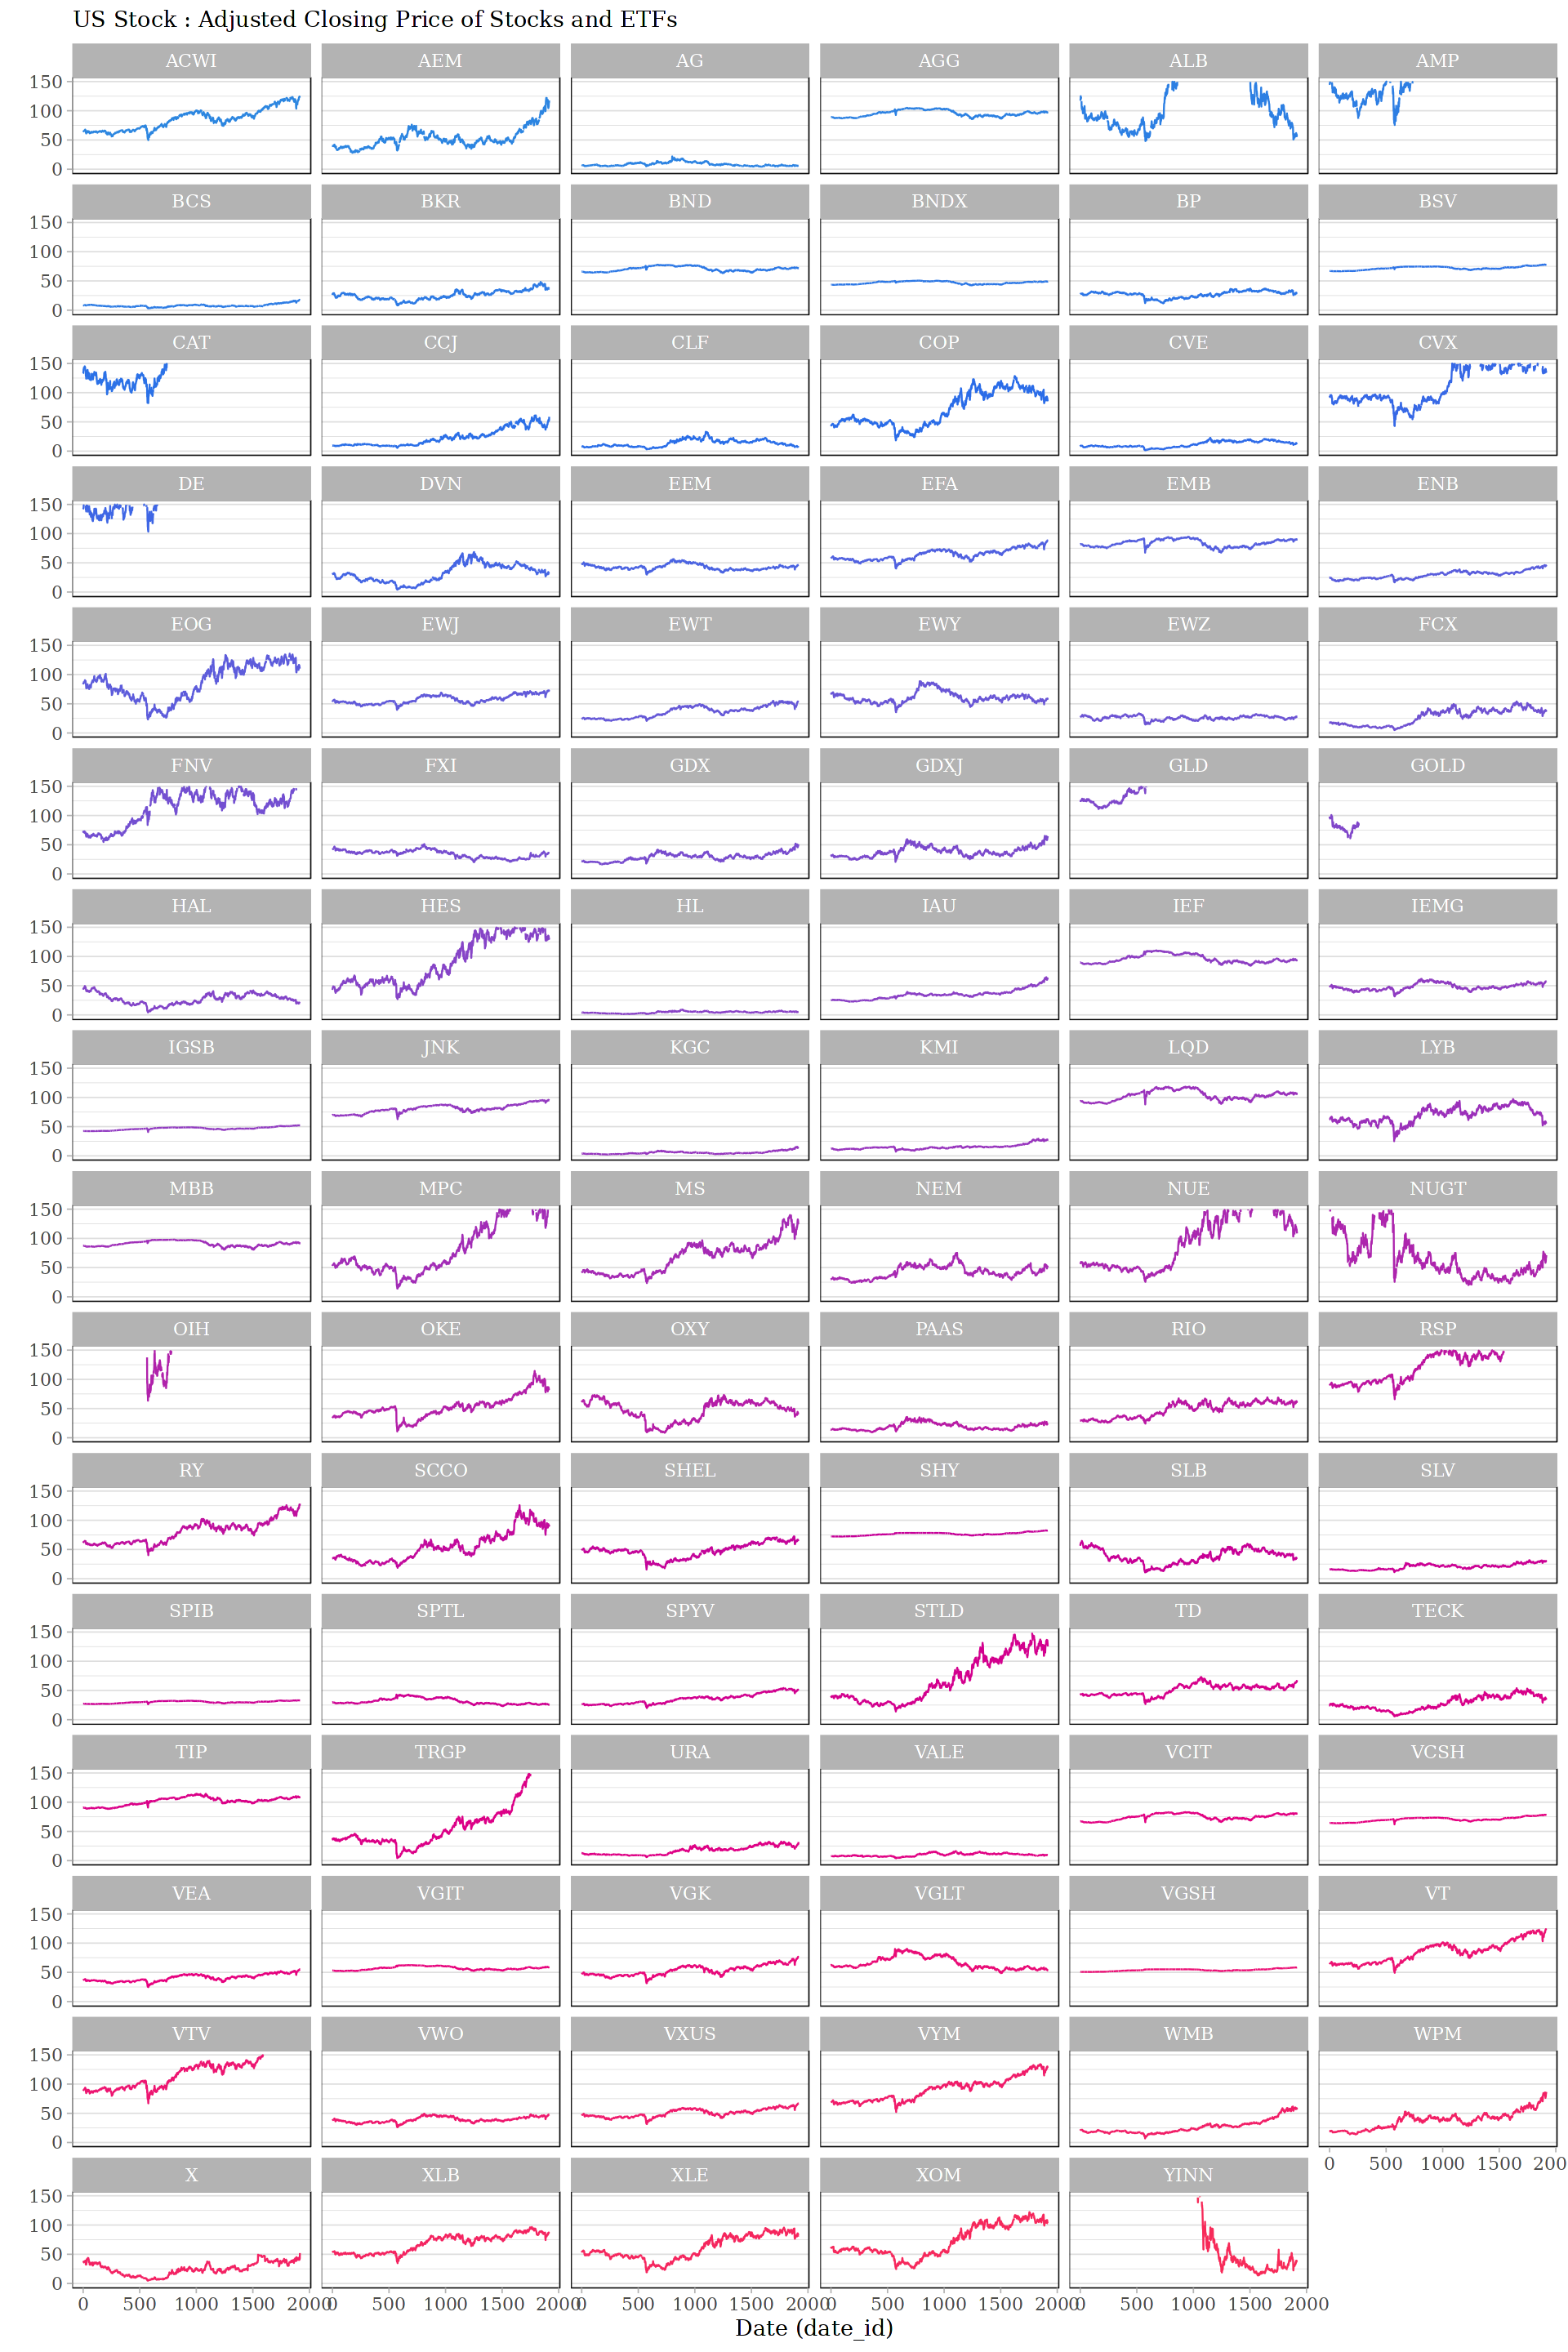

In [10]:
uss_long <- train[, c(1L, uss_info$Column_Id)] |>
  structure(
    names = c("date_id", uss_tickers)
  ) |>
  pivot_longer(
    cols = - date_id,
    names_to = "Stock",
    values_to = "Price"
  )

figsize(16, 24)
gg <- ggplot(uss_long) +
  geom_line(aes(x = date_id, y = Price, color = Stock)) +
  labs(
    subtitle = "US Stock : Adjusted Closing Price of Stocks and ETFs",
    x = "Date (date_id)", y = ""
  ) +
  scale_color_theme(color.theme("shap", "qualitative")) +
  ylim(0, 150) +
  facet_wrap(~ Stock, ncol = 6L) +
  theme(legend.position = "none")
suppressWarnings(plot(gg))

## Foreign Currency Exchange Rates

Finally, we analyze the structure of the Forex data. The 38 currency pairs are derived from 10 unique currencies.

In [11]:
forex_info <- train_info |>
  filter(Category == "FX") |>
  mutate(
    Currency_1 = substr(Type, 1L, 3L),
    Currency_2 = substr(Type, 4L, 6L)
  ) |>
  select(-Type, - Ticker)

forex_info_jp <- forex_info |> filter(Currency_2 == "JPY")
forex_tickers <- paste0(forex_info_jp[["Currency_1"]], "-", forex_info_jp[["Currency_2"]])
forex_info_jp

Column_Id Column    Category Currency_1 Currency_2
1 521       FX_AUDJPY FX       AUD        JPY       
2 523       FX_CADJPY FX       CAD        JPY       
3 524       FX_CHFJPY FX       CHF        JPY       
4 527       FX_EURJPY FX       EUR        JPY       
5 530       FX_GBPJPY FX       GBP        JPY       
6 532       FX_NZDJPY FX       NZD        JPY       
7 535       FX_USDJPY FX       USD        JPY       
8 536       FX_ZARJPY FX       ZAR        JPY       
9 557       FX_NOKJPY FX       NOK        JPY

The following graph shows which currency pairs are included in the dataset. For instance, JPY is connected to many other currencies, indicating that pairs like USD-JPY and EUR-JPY are present.

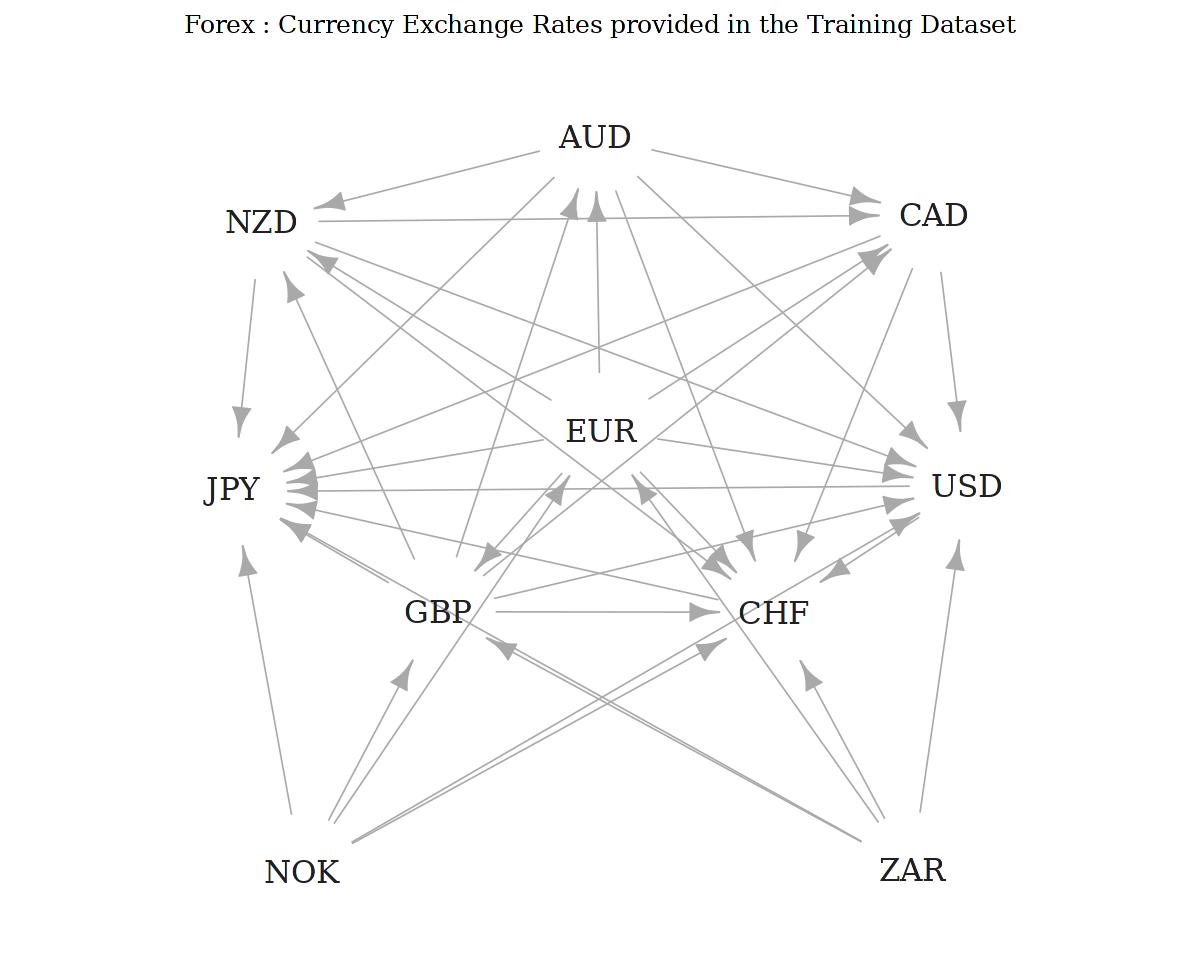

In [12]:
figsize(10, 8)
par.midr(mar = c(0, 0, 2, 0))
set.seed(42)
g <- graph_from_data_frame(select(forex_info, Currency_1, Currency_2))
plot(g,
     vertex.shape = "none",
     vertex.size = 30,
     vertex.label.cex = 1.5,
     vertex.label.color = "#202020",
     layout = layout_nicely(g))
title("Forex : Currency Exchange Rates provided in the Training Dataset")

As a final step of our EDA about historical prices, let's plot the time series for all currency pairs against the Japanese Yen (JPY).

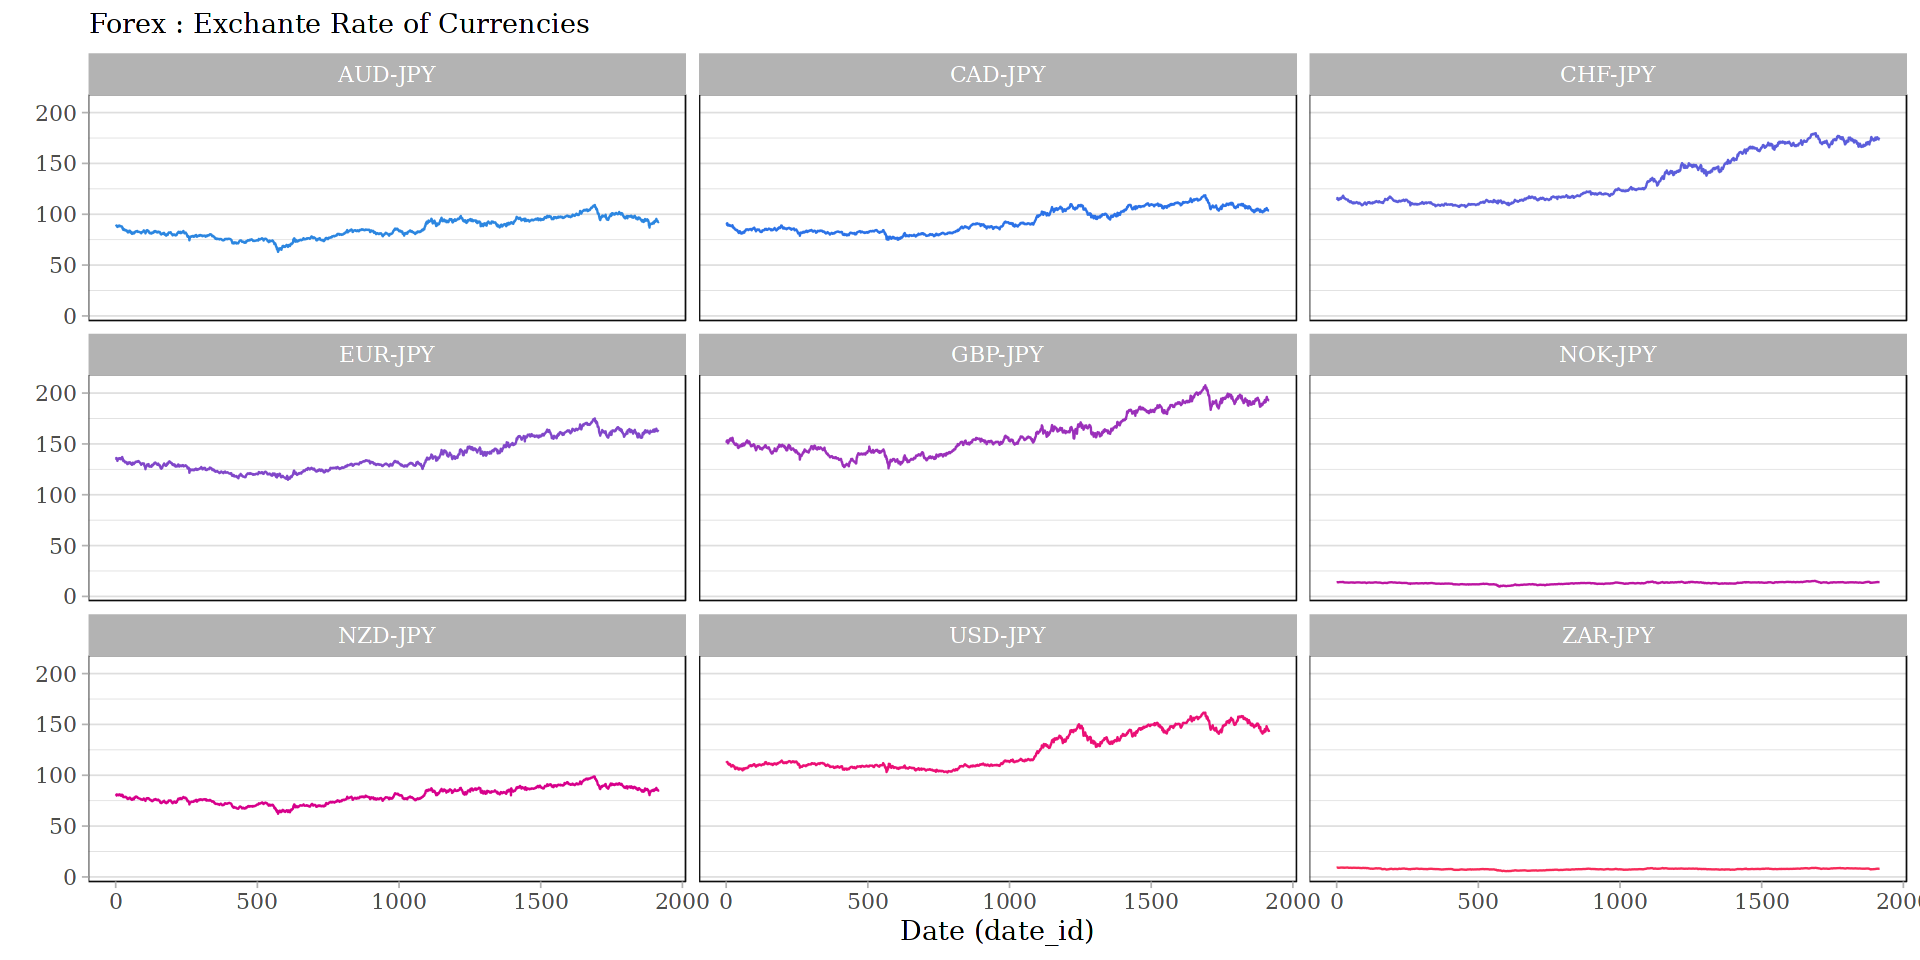

In [13]:
forex_long <- train[, c(1L, forex_info_jp$Column_Id)] |>
  structure(
    names = c("date_id", forex_tickers)
  ) |>
  pivot_longer(
    cols = - date_id,
    names_to = "Currencies",
    values_to = "Rate"
  )

figsize(16, 8)
gg <- ggplot(forex_long) +
  geom_line(aes(x = date_id, y = Rate, color = Currencies)) +
  labs(
    subtitle = "Forex : Exchante Rate of Currencies",
    x = "Date (date_id)", y = ""
  ) +
  scale_color_theme(color.theme("shap", "qualitative")) +
  facet_wrap(~ Currencies, ncol = 3L) +
  theme(legend.position = "none")
suppressWarnings(plot(gg))

The exchange rates show varying levels of volatility and correlation over the observed period.

# Logarithmic Returns

The `train_labels.csv` contains the target variables for this competition. It has 425 columns: one for `date_id`, and 424 `target_*` columns. The calculation method for each target is explained in the corresponding row of `target_pairs.csv`.

Each target is either the **logarithmic return** of a single historical price feature or the **difference of logarithmic returns** of two features (a spread; see below).

**Definition of Loarithmic Return**

The logarithmic return (or log return) of an asset over $k$ time periods is calculated using its price at two points in time. Let $P_t$ be the closing price at time $t$ and $P_{t-k}$ be the price $k$ periods earlier. The log return, $r_t$, is defined as:

$$
r_t = \ln{\left( \frac{P_t}{P_{t-k}} \right)} = \ln(P_t) - \ln(P_{t-k})
$$

The diffrence between the log returns of two assets, $A$ and $B$, is often called a **spread**. This concept is central to a strategy known as [**Pairs Trading**](https://en.wikipedia.org/wiki/Pairs_trade). 

$$
Spread_t = r^A_t - r^B_t = \left(\ln(P^A_t) - \ln(P^A_{t-k})\right) - \left(\ln(P^B_t) - \ln(P^B_{t-k})\right)
$$

First, we define a helper function to calculate log returns and then parse the `target_pairs.csv` to understand how each target is constructed.

In [14]:
log_return <- function(data, lag = 1L, padding = TRUE) {
  n <- length(data)
  logret <- log(data[(1L + lag):n] / data[1L:(n - lag)])
  c(if (padding) rep(NA, lag), logret)
}

target_definitions <- pairs[["pair"]] |>
  str_split(" - ", simplify = TRUE)

target_info <- pairs |>
  mutate(
    is.pair = target_definitions[, 2L] != "",
    price_1 = target_definitions[, 1L],
    price_2 = target_definitions[, 2L]
  ) |>
  select(-pair)

## Logarithmic Return of Single Asset

Most targets are spreads between two price features. However, four targets are based on the log return of a single asset. Let's investigate these first.

In [15]:
target_info |> filter(is.pair == FALSE)

target     lag is.pair price_1                 price_2
1 target_0   1   FALSE   US_Stock_VT_adj_close          
2 target_106 2   FALSE   US_Stock_VXUS_adj_close        
3 target_212 3   FALSE   FX_ZARUSD                      
4 target_318 4   FALSE   FX_NOKEUR

These four single-asset targets are noteworthy. At first glance, the choice of these specific assets and the varying lags (1, 2, 3, and 4) is intriguing and not immediately obvious.

**Verifying the Target Calculation (target_0)**

Let's verify the calculation for `target_0`. We'll compare the official target values from `train_labels.csv` with our own calculation using the `log_return()` function.

In [16]:
# target_0
target <- data.frame(
  date_id = labels[["date_id"]],
  target = labels[["target_0"]],
  calculated = log_return(train[["US_Stock_VT_adj_close"]], 1L)
)
head(target)

date_id target       calculated 
1 0        0.005948498          NA
2 1        0.005782807 0.006784686
3 2        0.001048254 0.005948498
4 3        0.001699733 0.005782807
5 4       -0.003271759 0.001048254
6 5        0.007315577 0.001699733

The table above reveals a critical detail about the target definition. The value of `target_0` at `date_id = 0` (which is 0.005948...) does not match our calculated value at `date_id = 0` (which is NA). Instead, it matches the calculated value at `date_id = 2`.

This confirms that the target for `date_id = t` is the log return calculated from `t + 1` to `t + lag + 1`. This can actually be obtained by the `generate_log_returns()` function defined in [the competition notebook](https://www.kaggle.com/code/sohier/mitsui-target-calculation-example).

The rationale for this forward-looking target can be interpreted as a hypothetical trading scenario: At the end of day `t`, we use the information available up to that point to decide on a trade. We then execute that trade at the "closing" price of day `t + 1`, and the target represents the realized log return of that position calculated over the subsequent lag period (i.e., using the price at `t + 1 + lag`).

This forward-looking nature is a crucial feature of the competition datasets. The following plots show that our calculated series is simply a lagged version of the official target series.

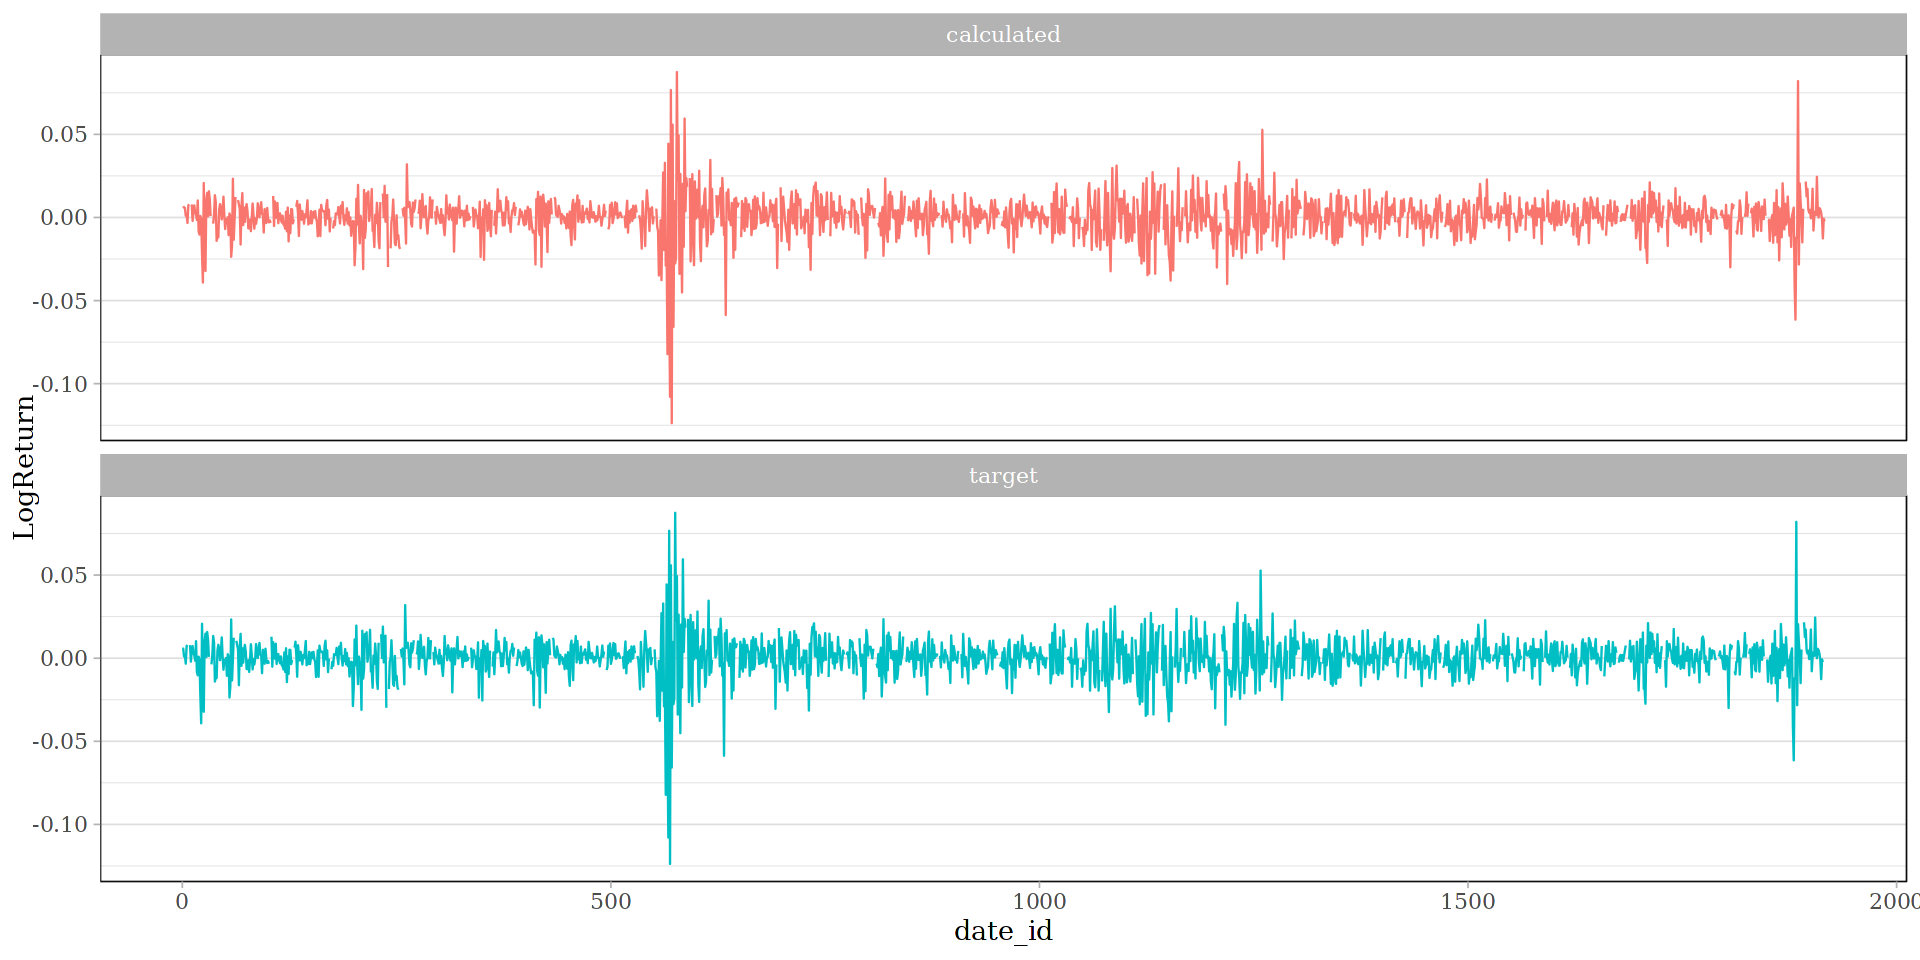

In [17]:
target_long <- target |>
  pivot_longer(
    cols = - date_id, names_to = "Class", values_to = "LogReturn"
  )

figsize(16, 8)
gg <- ggplot(target_long, aes(date_id, LogReturn, color = Class)) +
  geom_line() +
  facet_wrap(~ Class, ncol = 1L) +
  theme(legend.position = "none")
suppressWarnings(plot(gg))

It's a well-known phenomenon that financial log returns tend to exhibit "fat tails" when compared to a theoretical normal distribution. To see if our data follows this pattern, the following plot compares the kernel density estimate (KDE) of the `target` log returns against a normal distribution with the same mean and standard deviation.

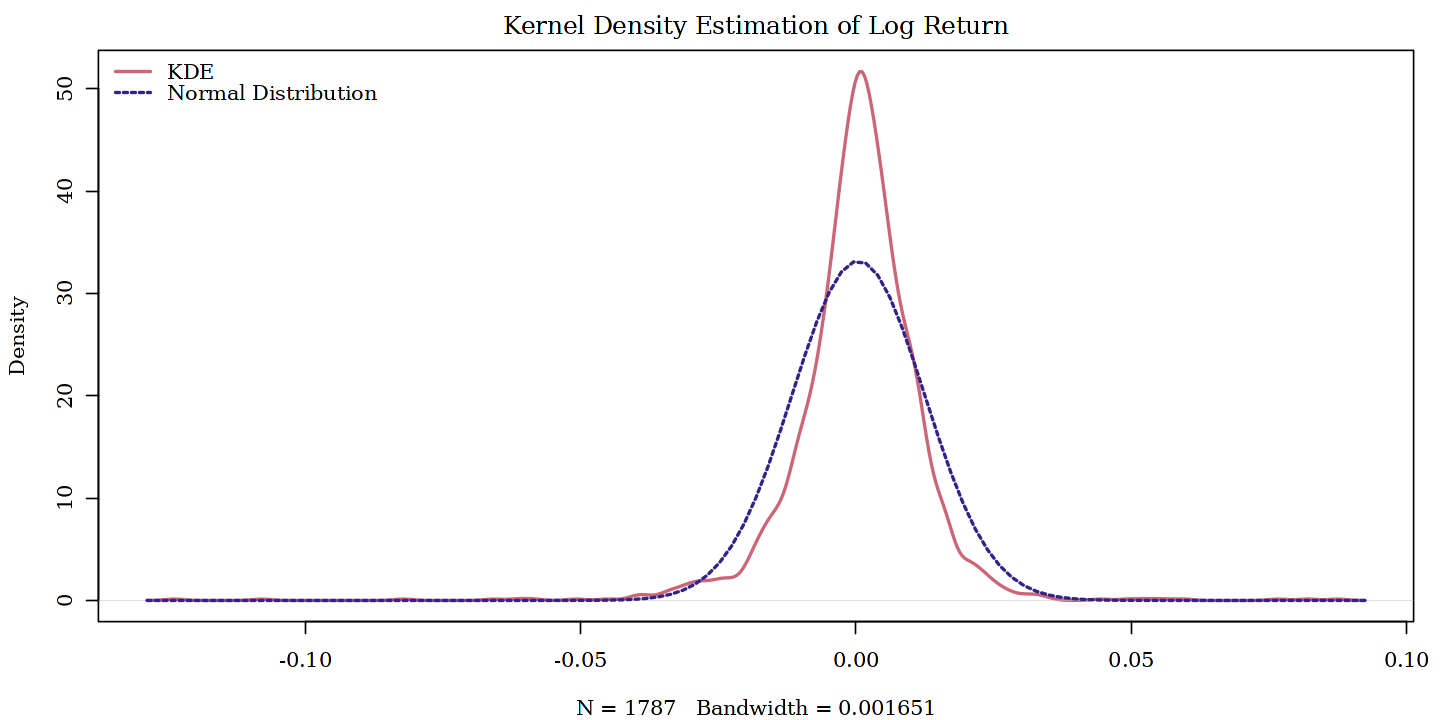

In [18]:
returns <- na.omit(target[["target"]])
colors <- color.theme("muted")$palette(2L)

par.midr()
figsize(12, 6)
plot(density(returns), col = colors[1L], lwd = 2,
     main = "Kernel Density Estimation of Log Return")
curve(dnorm(x, mean = mean(returns), sd = sd(returns)),
      add = TRUE, col = colors[2L], lty = 2L, lwd = 2)
legend("topleft", legend = c("KDE", "Normal Distribution"), 
       col = colors,  lty = c(1L, 2L), lwd = 2L, bt = "n")

The Q-Q (Quantile-Quantile) plot below provides further evidence for this "fat-tailed" behavior.

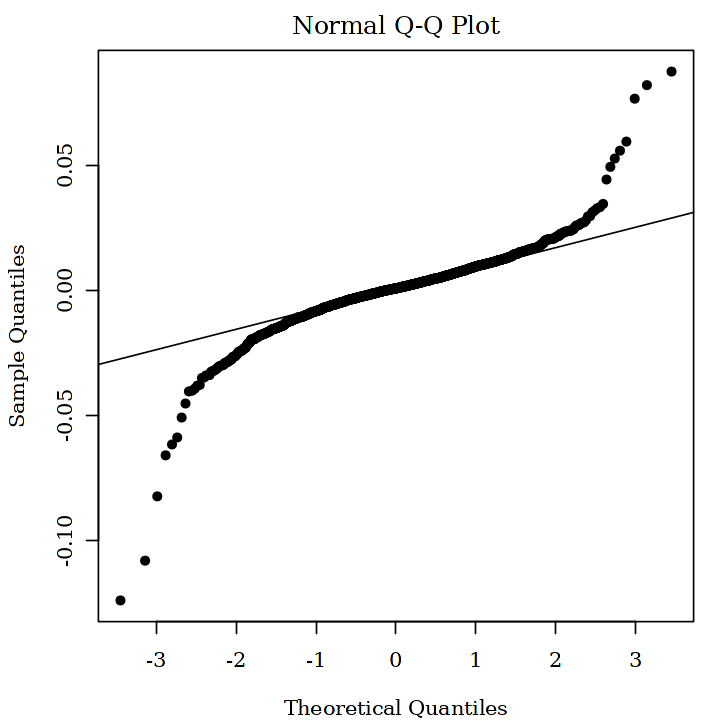

In [19]:
figsize(6, 6)
par.midr()
qqnorm(returns)
qqline(returns)

**Verifying the Target Calculation - target_318**

Let's perform the same verification for `target_318`, which has a lag of 4.

In [20]:
# target_318
target <- data.frame(
  date_id = labels[["date_id"]],
  target = labels[["target_318"]],
  calculated = log_return(train[["FX_NOKEUR"]], 4L)
)
head(target)

date_id target       calculated 
1 0        0.006156256          NA
2 1        0.009334222          NA
3 2        0.004108013          NA
4 3       -0.000357742          NA
5 4        0.001180306 0.013567382
6 5       -0.001061817 0.006156256

As with the previous example, the target values are forward-looking. The value of `target_318` at `date_id = 0` (0.006156...) matches our calculated value at `date_id = 5`.

This confirms the general rule: the target for `date_id = t` is the log return calculated from prices at `t + 1` and `t + 1 + lag`.

Again, the plot illustrates that our calculated log return series perfectly matches the official target series, just with a time shift.

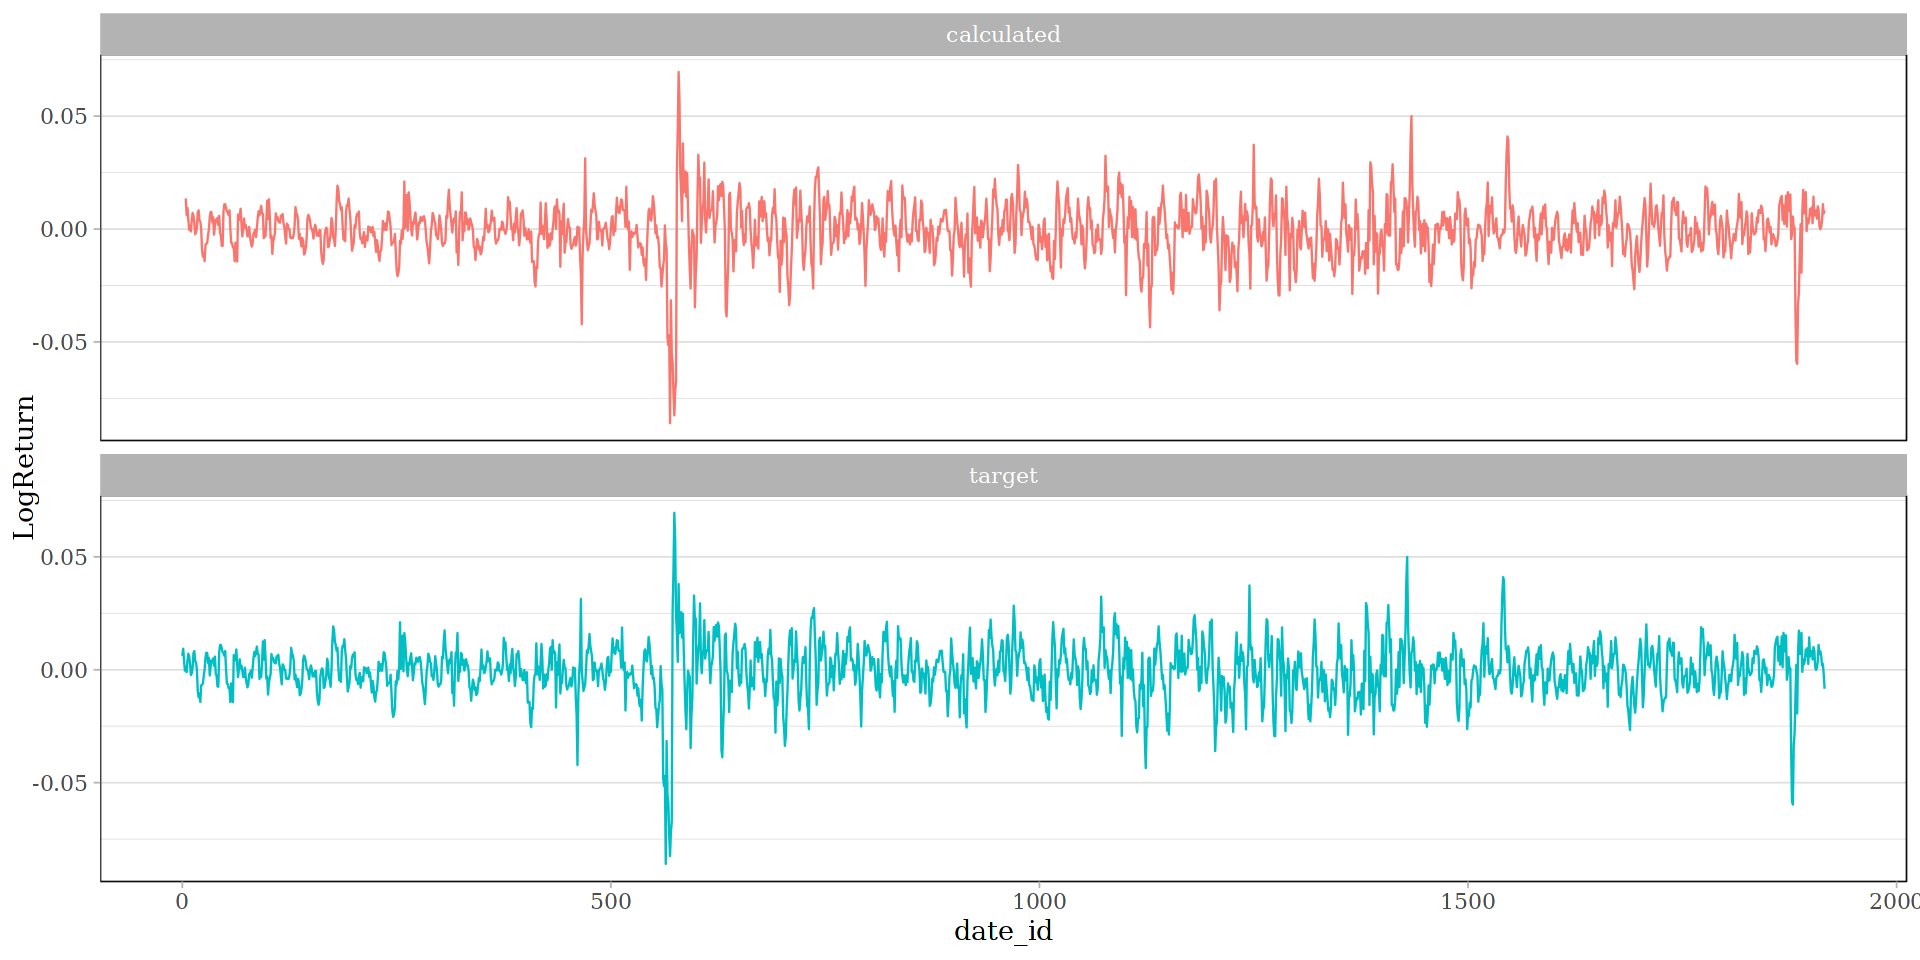

In [21]:
target_long <- target |>
  pivot_longer(
    cols = - date_id, names_to = "Class", values_to = "LogReturn"
  )

figsize(16, 8)
gg <- ggplot(target_long, aes(date_id, LogReturn, color = Class)) +
  geom_line() +
  facet_wrap(~ Class, ncol = 1L) +
  theme(legend.position = "none")
suppressWarnings(plot(gg))

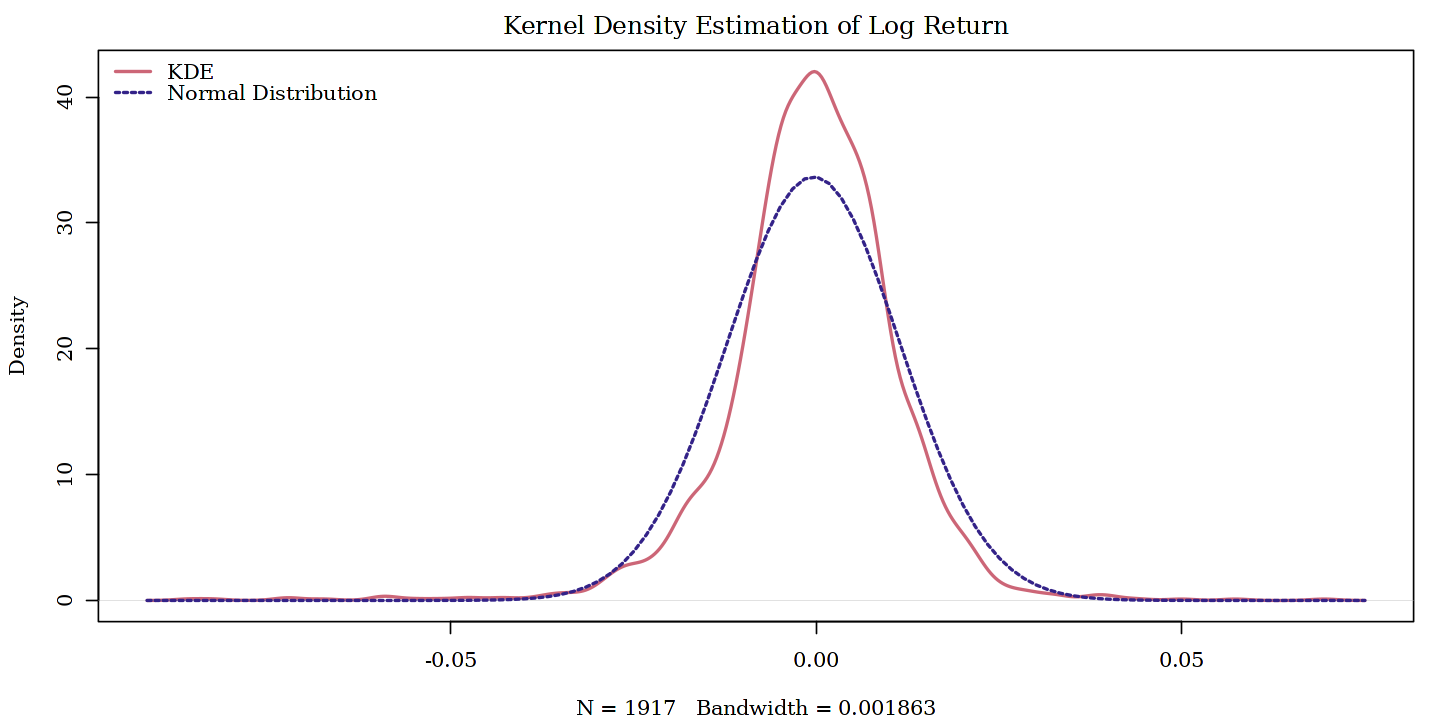

In [22]:
returns <- na.omit(target[["target"]])
colors <- color.theme("muted")$palette(2L)

par.midr()
figsize(12, 6)
plot(density(returns), col = colors[1L], lwd = 2,
     main = "Kernel Density Estimation of Log Return")
curve(dnorm(x, mean = mean(returns), sd = sd(returns)),
      add = TRUE, col = colors[2L], lty = 2L, lwd = 2)
legend("topleft", legend = c("KDE", "Normal Distribution"), 
       col = colors,  lty = c(1L, 2L), lwd = 2L, bt = "n")

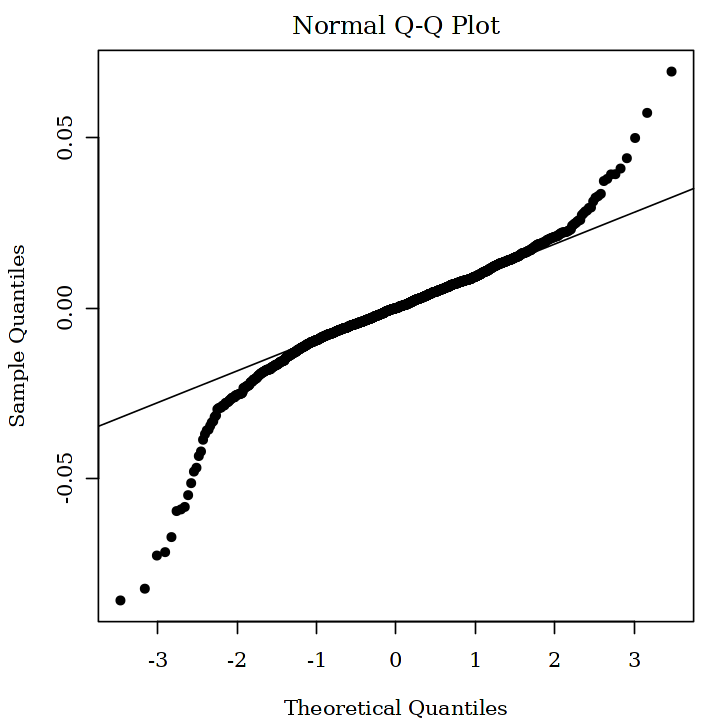

In [23]:
figsize(6, 6)
par.midr()
qqnorm(returns)
qqline(returns)

## Spread between Pair of Assets

Most of the target variables in this competition are spreads, defined as the difference between the logarithmic returns of two different assets. This approach is central to statistical arbitrage strategies like Pairs Trading. Let's investigate one of these pairs to verify its calculation.

In [24]:
target_info |> filter(is.pair == TRUE) |> head()

target   lag is.pair price_1      price_2                            
1 target_1 1   TRUE    LME_PB_Close US_Stock_VT_adj_close              
2 target_2 1   TRUE    LME_CA_Close LME_ZS_Close                       
3 target_3 1   TRUE    LME_AH_Close LME_ZS_Close                       
4 target_4 1   TRUE    LME_AH_Close JPX_Gold_Standard_Futures_Close    
5 target_5 1   TRUE    LME_ZS_Close JPX_Platinum_Standard_Futures_Close
6 target_6 1   TRUE    LME_PB_Close LME_AH_Close

As show in the above table, the targets are constructed from a diverse mix of assets across different categories (LME, JPX, US Stocks, Forex).

**Verifying the Spread Calculation (target_2)**

As an example, we will investigate `target_2`, which is the spread between the log returns of **LME Copper** (`LME_CA_Close`) and **LME Zinc** (`LME_ZS_Close`).
We'll calculate the individual log returns for each asset, compute their difference (Column `calculated`), and compare it to the official `target_2` value from `train_labels.csv`.

In [25]:
target <- data.frame(
  date_id = labels[["date_id"]],
  target = labels[["target_2"]],
  returns_1 = log_return(train[[target_info[3, 4]]], 1L),
  returns_2 = log_return(train[[target_info[3, 5]]], 1L)
) |>
  mutate(
    calculated = returns_1 - returns_2
  )

target |> head()

date_id target       returns_1     returns_2    calculated  
1 0       -0.004675199            NA           NA           NA
2 1       -0.007051990 -0.0080825412 -0.006590797 -0.001491744
3 2       -0.008934059  0.0057898386  0.010465038 -0.004675199
4 3        0.011943313 -0.0094343619 -0.002382372 -0.007051990
5 4        0.006855609  0.0005615612  0.009495620 -0.008934059
6 5       -0.016625846 -0.0032332916 -0.015176604  0.011943313

As with the single-asset targets, we observe that our calculated spread series is a lagged version of the official target series. This confirms that the forward-looking calculation applies to spreads as well: the spread for `date_id = t` is based on the returns calculated from `t + 1` onwards.

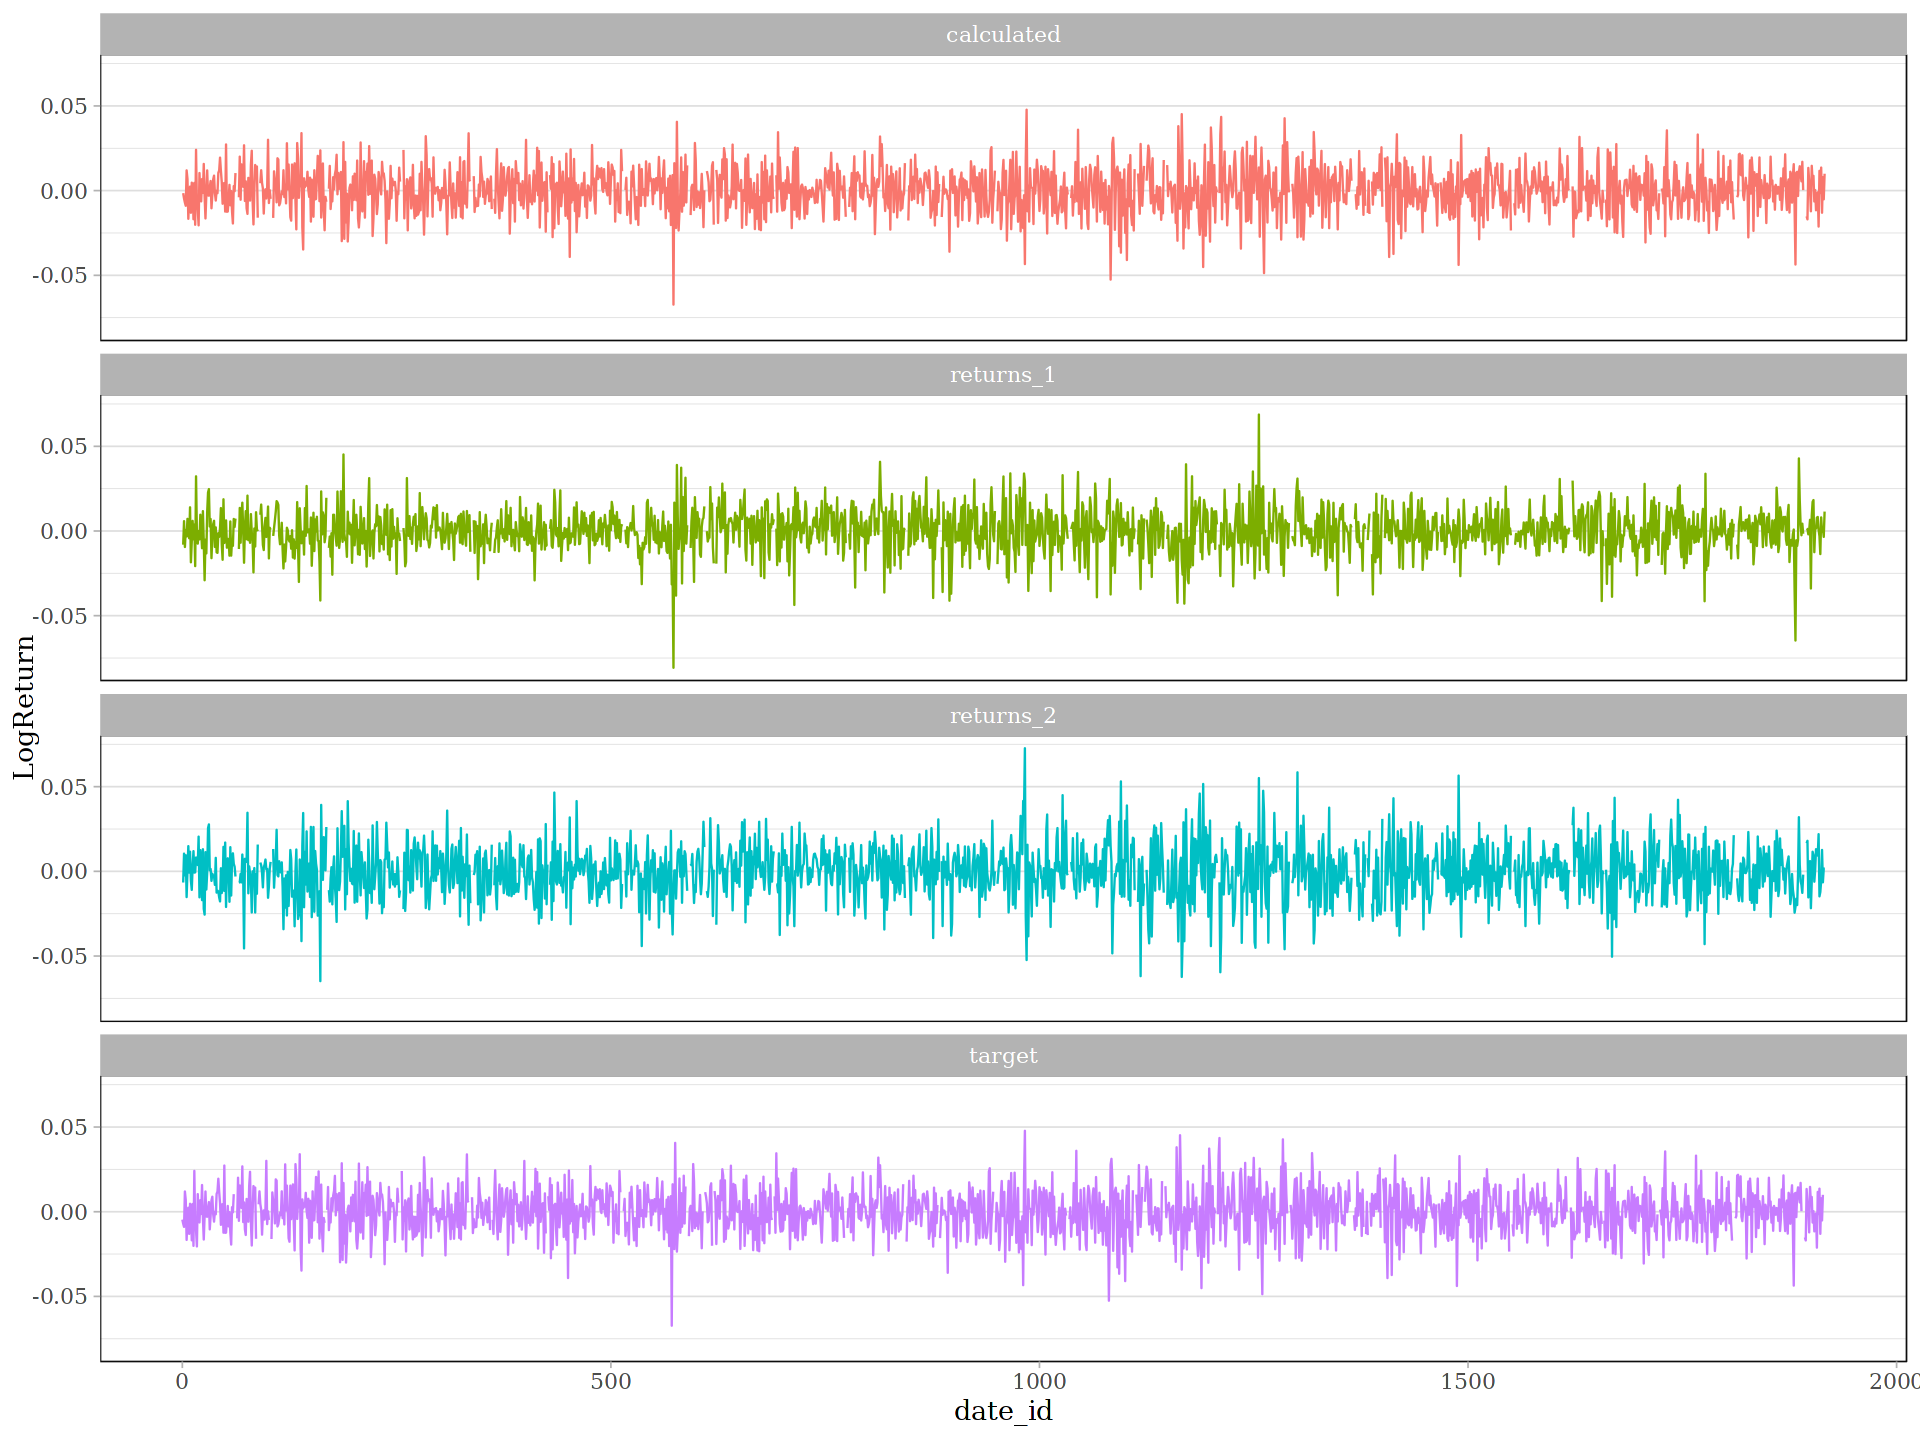

In [26]:
target_long <- target |>
  pivot_longer(
    cols = - date_id, names_to = "Class", values_to = "LogReturn"
  )

figsize(16, 12)
gg <- ggplot(target_long, aes(date_id, LogReturn, color = Class)) +
  geom_line() +
  facet_wrap(~ Class, ncol = 1L) +
  theme(legend.position = "none")
suppressWarnings(plot(gg))

Finally, let's create a scatter plot to visualize the relationship between the daily log returns of the two assets in our pair (Copper and Zinc). The dashed line represents `y = x`. Points close to this line indicate days where both assets had similar returns.

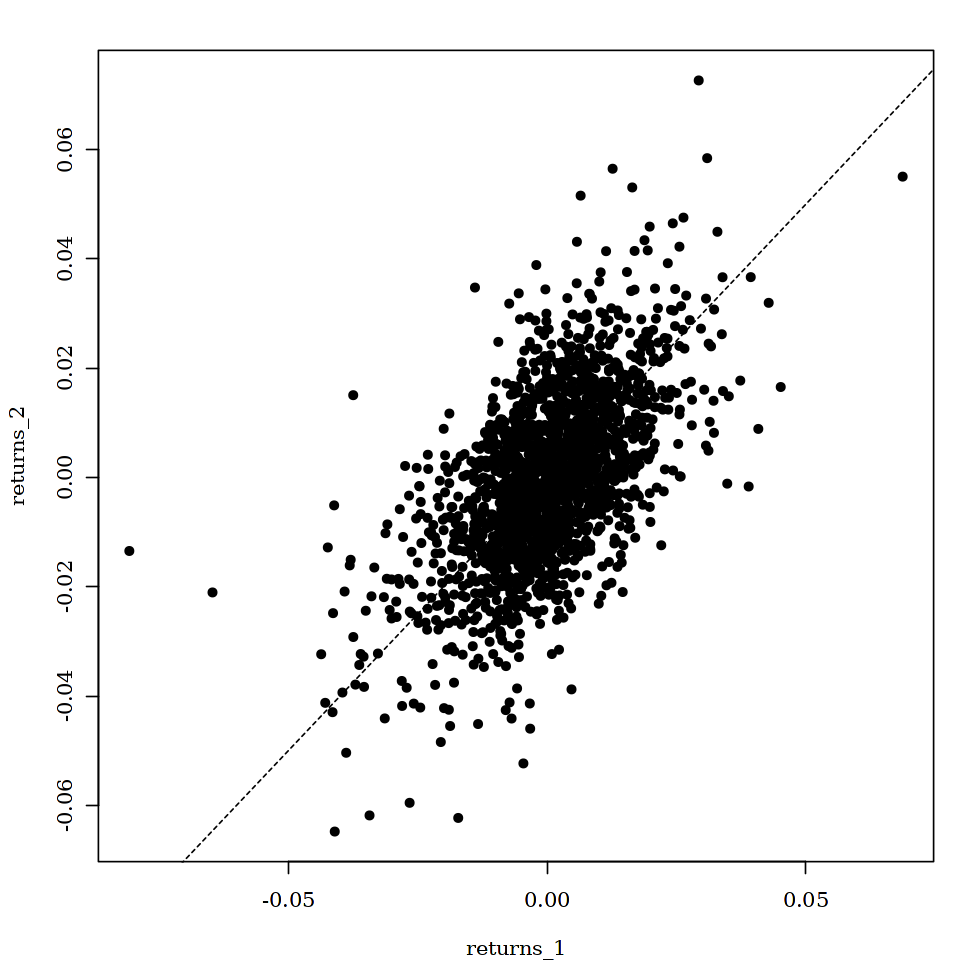

In [27]:
figsize(8, 8)
par.midr()
plot(returns_2 ~ returns_1, target)
abline(0, 1, lty = 2L)

The scatter plot shows a positive correlation between the returns of Copper and Zinc, which is expected for industrial metals.

## Six Hub Assets and Correlation Structure

To conclude our initial EDA, let's visualize the entire target landscape as a network graph. In this graph, each asset (Ticker) is a node, and each target pair defined in `target_pairs.csv` creates a link between two nodes. This helps us understand the overall structure and connectivity of the assets in the competition.

The following six assets seem to be more important than other assets:
- Gold_Standard_Futures
- Platinum_Standard_Futures
- AH
- CA
- PB
- ZS

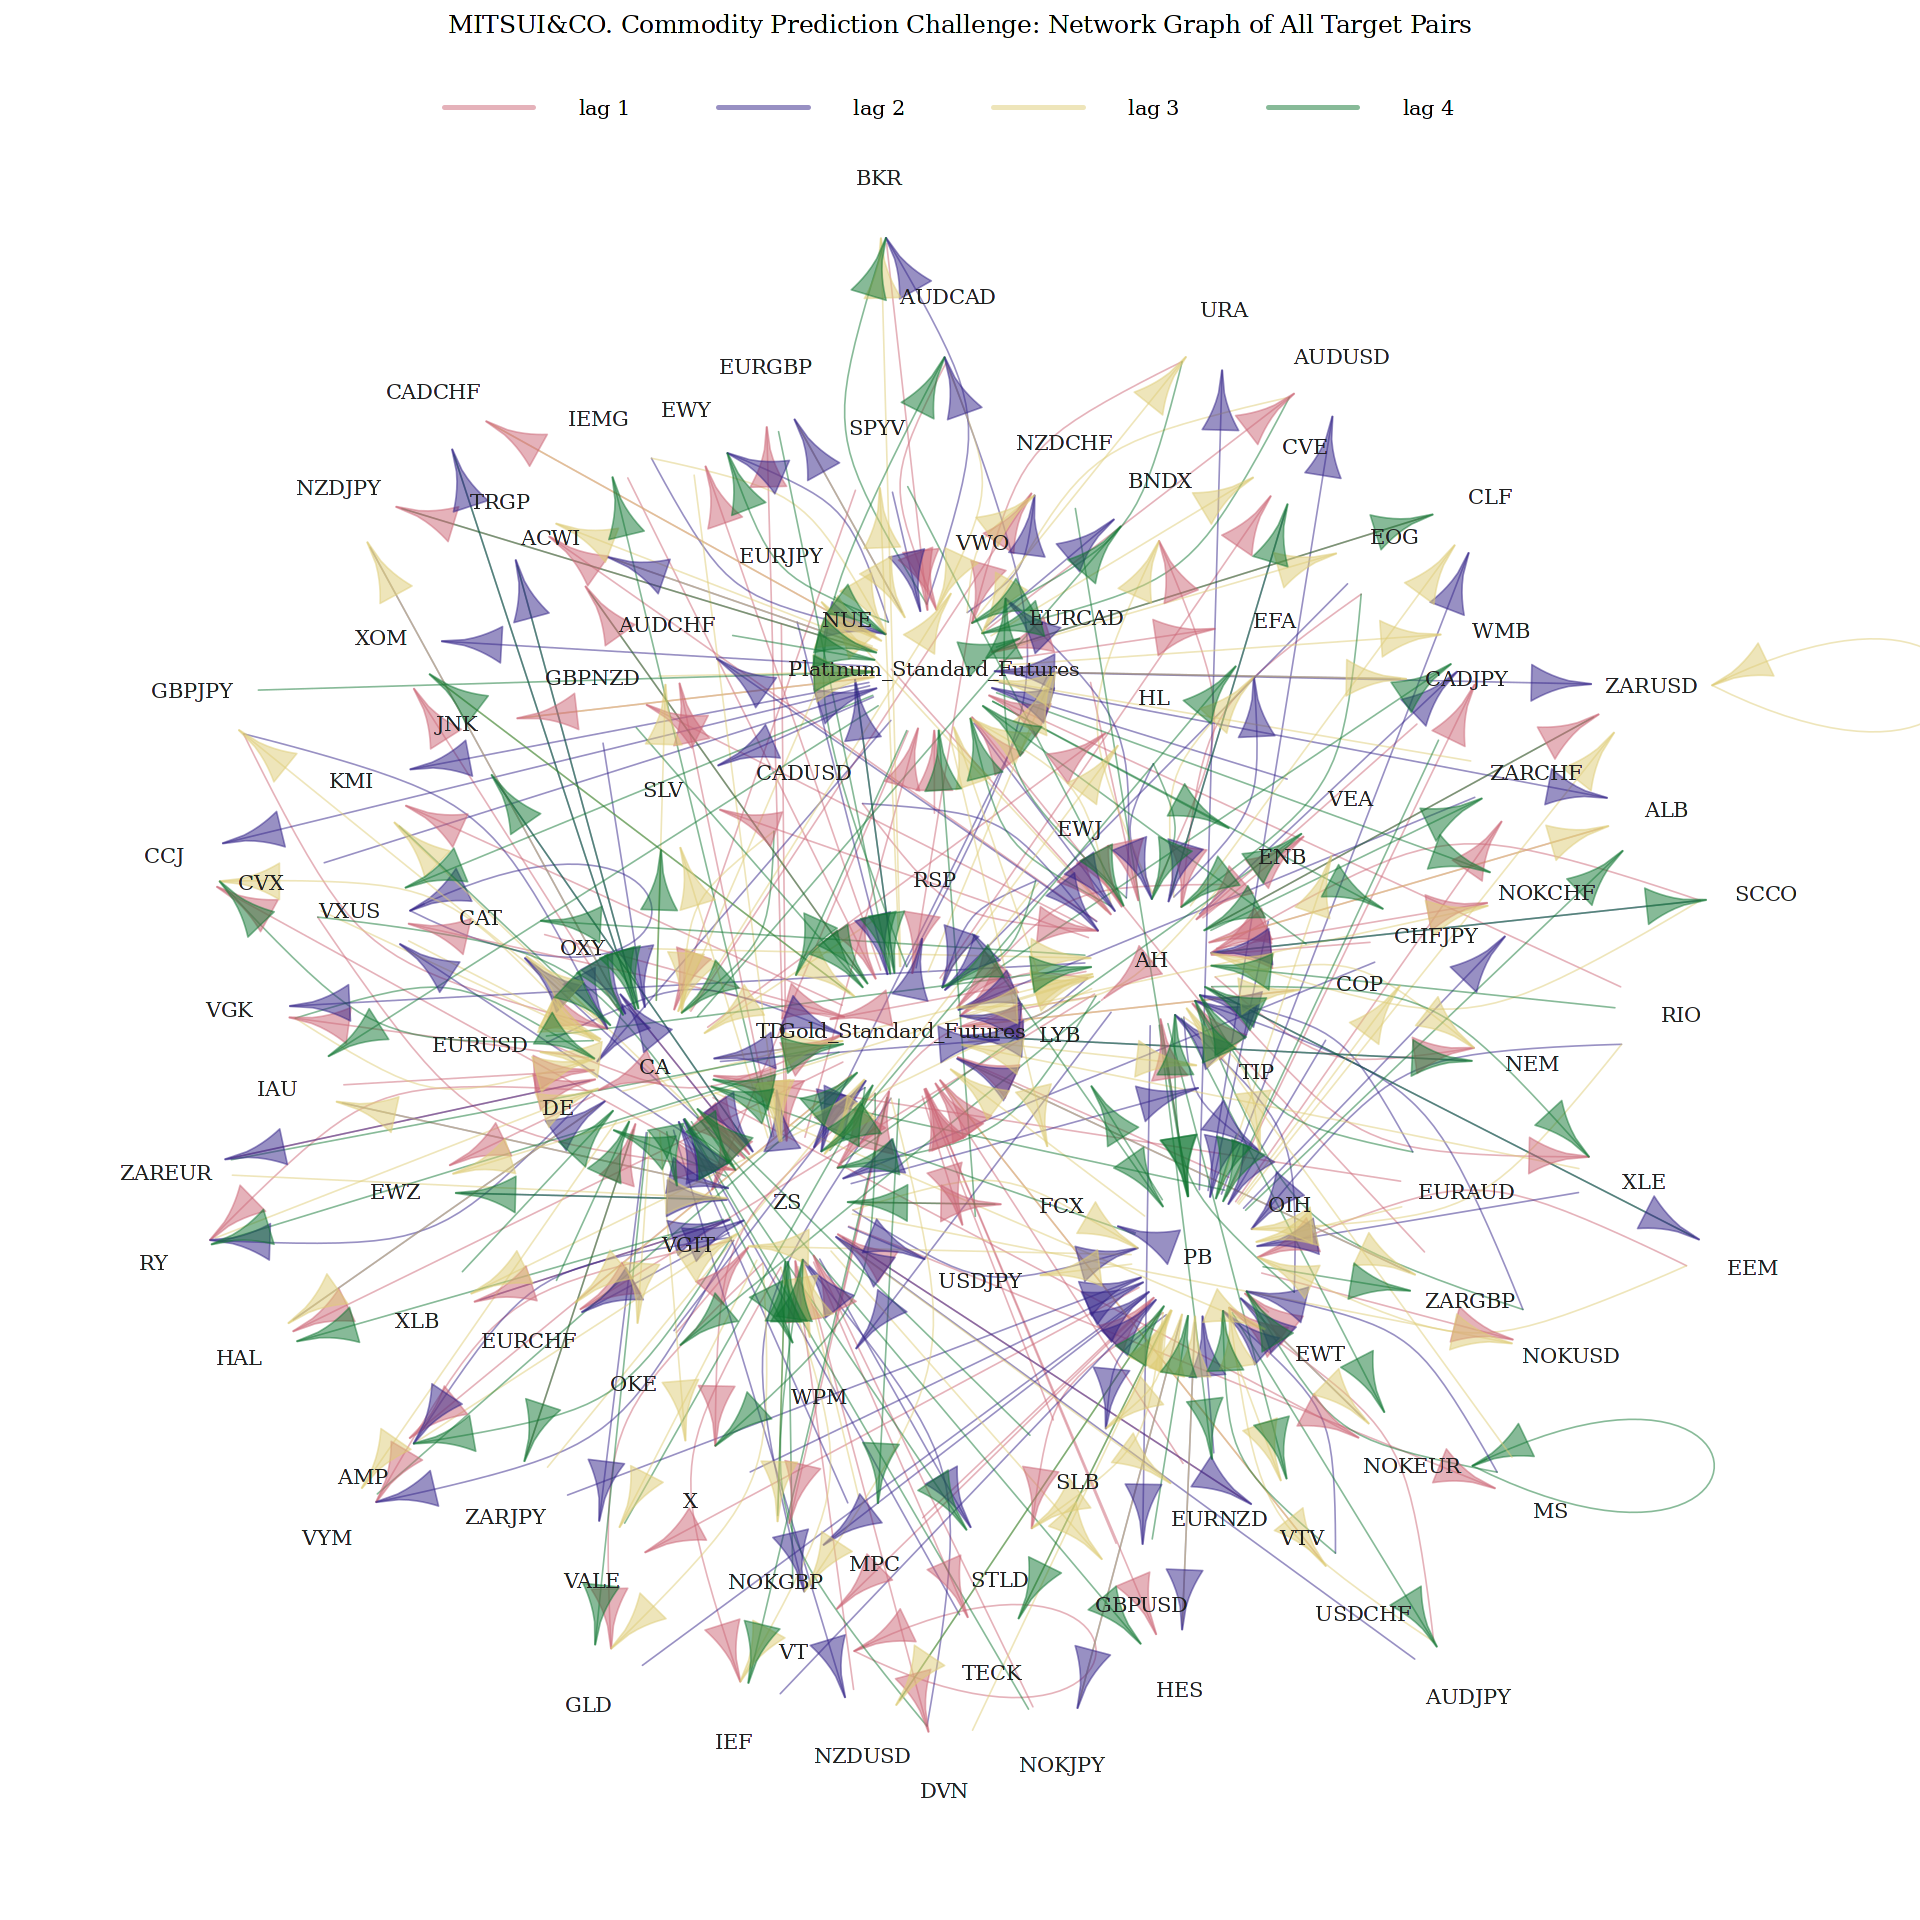

In [28]:
temp <- target_info |>
  mutate(
    price_2 = if_else(price_2 == "", price_1, price_2)
  ) |>
  left_join(
      train_info |> select(P1 = Ticker, price_1 = Column),
      by = "price_1"
  ) |>
  left_join(
      train_info |> select(P2 = Ticker, price_2 = Column),
      by = "price_2"
  )

figsize(16, 16)
par.midr(mar = c(0, 0, 2, 0))
set.seed(42)
g <- graph_from_data_frame(select(temp, P1, P2))
E(g)$color <- paste0(color.theme("muted")$palette(4L), "80")[temp[["lag"]]]
plot(g,
     vertex.shape = "none",
     vertex.label.color = "#202020",
     layout = layout_nicely(g))
legend("top",
       legend = c("lag 1", "lag 2", "lag 3", "lag 4"),
       col = paste0(color.theme("muted")$palette(4L), "80"),
       lty = 1, lwd = 3, bty = "n", horiz = TRUE)
title("MITSUI&CO. Commodity Prediction Challenge: Network Graph of All Target Pairs")

As shown in the table below, all targets are associated with at least one of the six key "hub" assets, with the exception of the four self-reflecting log returns.

In [29]:
hub_assets <- c(
    "Gold_Standard_Futures",
    "Platinum_Standard_Futures", 
    "AH", "CA", "PB", "ZS"
)

temp |> filter(!temp[["P1"]] %in% hub_assets & !temp[["P2"]] %in% hub_assets)

target     lag is.pair price_1                 price_2                 P1    
1 target_0   1   FALSE   US_Stock_VT_adj_close   US_Stock_VT_adj_close   VT    
2 target_106 2   FALSE   US_Stock_VXUS_adj_close US_Stock_VXUS_adj_close VXUS  
3 target_212 3   FALSE   FX_ZARUSD               FX_ZARUSD               ZARUSD
4 target_318 4   FALSE   FX_NOKEUR               FX_NOKEUR               NOKEUR
  P2    
1 VT    
2 VXUS  
3 ZARUSD
4 NOKEUR

Let's visualize the correlation matrix for the group of targets associated with "CA". In the plot below, the first 37 targets have CA as asset A, while the remaining 33 targets have CA as asset B.

corrplot 0.92 loaded



37 33

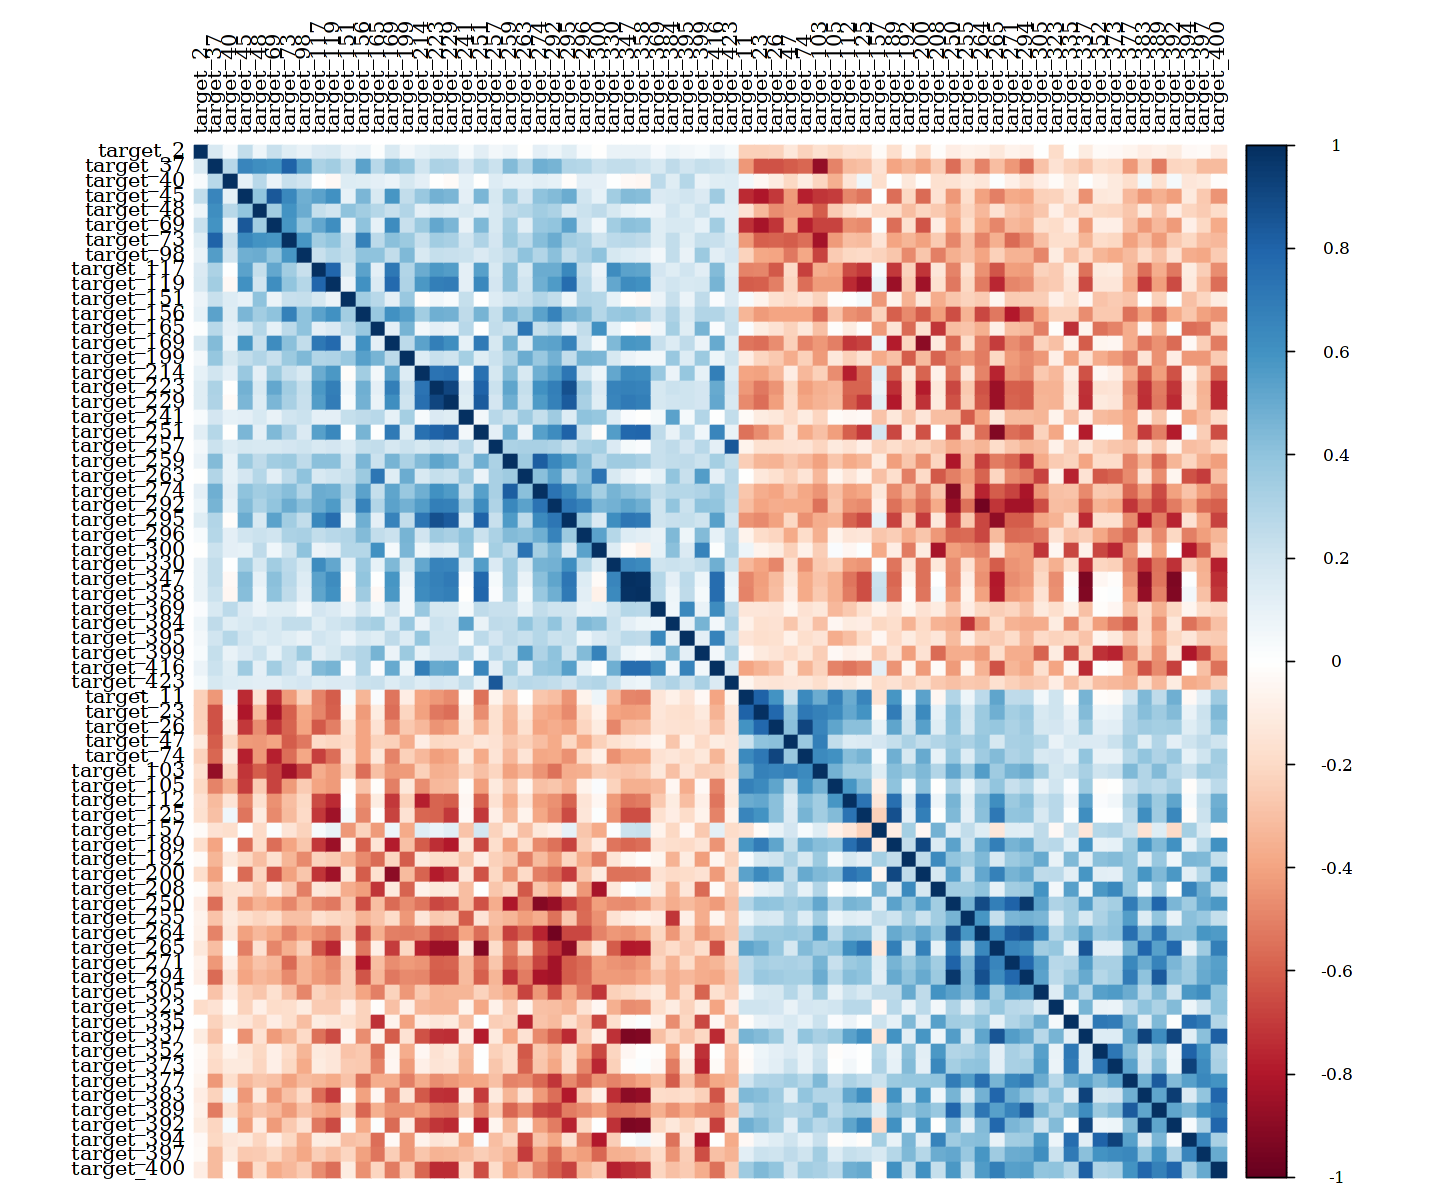

In [30]:
par.midr()
figsize(12, 10)
library(corrplot)
temp_CA1 <- (temp |> filter(temp[["P1"]] == "CA"))[["target"]]
temp_CA2 <- (temp |> filter(temp[["P2"]] == "CA"))[["target"]]
temp_CA  <- c(temp_CA1, temp_CA2)
cormat_CA <- cor(labels |> select(all_of(temp_CA)),
                 use = "pairwise.complete.obs")
cat(length(temp_CA1), length(temp_CA2))
corrplot(cormat_CA, method = "color", tl.col = "black")

# Appendix - Public Data Sources

This appendix details how to use public data sources to understand the competition's dataset better, specifically by deducing its real-world timeframe and fetching additional data.

## Deducing Timeframe

The competition datasets do not provide explicit calendar dates, only an integer `date_id`. The `train.csv` covers `date_id` from `0` to `1916`, while the `test.csv` covers `date_id` from `1827` to `1916`.

However, we can deduce the real-world timeframe by aligning the price series from the competition data with historical data obtained from a public source. We will use the **quantmod** package in R to fetch historical data for the "SPDR Gold Shares ETF" (ticker: **GLD**) from Yahoo Finance and compare it to the corresponding data in `train.csv`.

First, let's confirm the range of `date_id` in the provided files.

In [31]:
cat("date_id in `train.csv`:", paste(range(train$date_id), collapse = " - "), end = "\n")
cat("date_id in `test.csv` :", paste(range(test$date_id), collapse = " - "))

date_id in `train.csv`: 0 - 1916 


date_id in `test.csv` : 1827 - 1916

Next, we'll fetch the historical data for GLD using quantmod and plot both time series. The visual similarity is immediately apparent, confirming they represent the same asset over the same period.

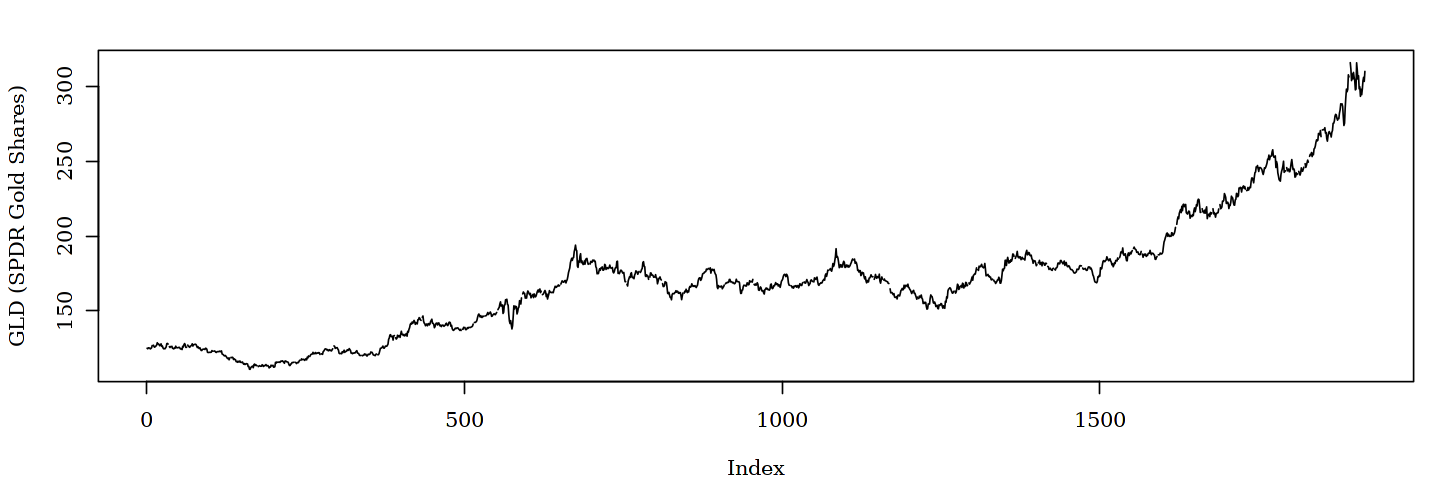

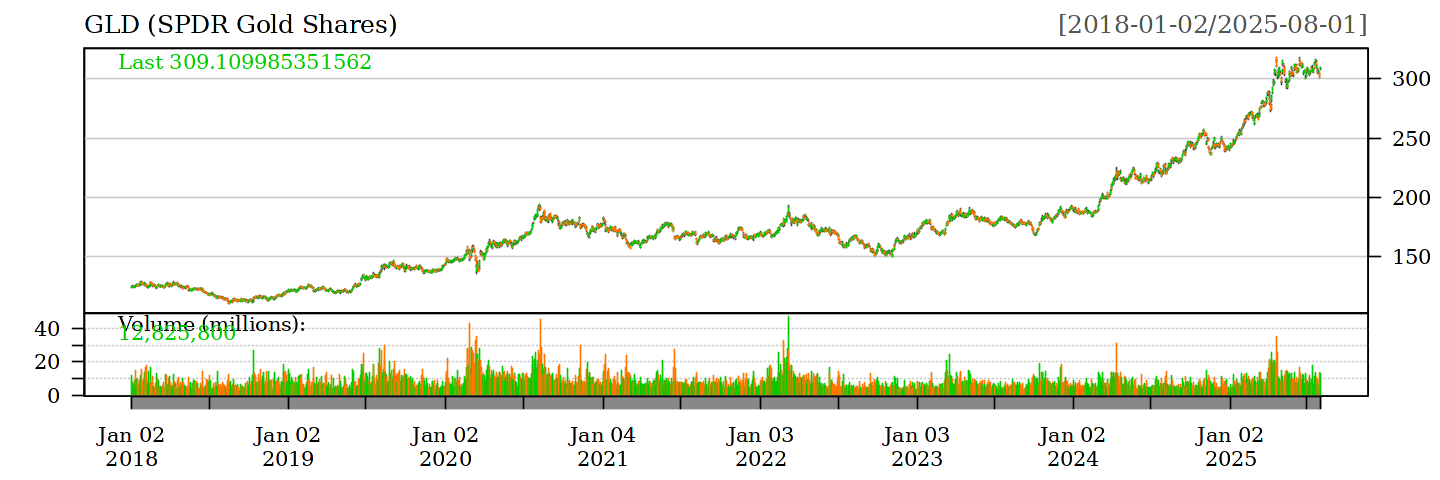

In [32]:
figsize(12, 4)
par.midr()

train_GLD <- train |>
  select(date_id,
         open = US_Stock_GLD_adj_open,
         high = US_Stock_GLD_adj_high,
         low = US_Stock_GLD_adj_low,
         close = US_Stock_GLD_adj_close)

yahoo_GLD <- getSymbols(
    "GLD", src = "yahoo", from = "2018-01-01", auto.assign = FALSE
)

plot(train_GLD$close, type = "l", ylab = "GLD (SPDR Gold Shares)")
chartSeries(yahoo_GLD, theme = "white", name = "GLD (SPDR Gold Shares)")

By comparing the first few rows and the last few rows of both datasets, we can create a mapping between some `date_id`s and the actual calendar dates.

In [33]:
# date_id 0 to 2
head(train_GLD, 3)
head(yahoo_GLD, 3)

date_id open   high   low     close 
1 0       124.66 125.18 124.390 125.15
2 1       125.05 125.09 124.101 124.82
3 2       124.89 125.85 124.740 125.46

           GLD.Open GLD.High GLD.Low GLD.Close GLD.Volume GLD.Adjusted
2018-01-02   124.66   125.18  124.39    125.15   11762500       125.15
2018-01-03   125.05   125.09  124.10    124.82    7904300       124.82
2018-01-04   124.89   125.85  124.74    125.46    7329700       125.46

In [34]:
# date_id 1914 to 1916
filter(train_GLD, date_id > 1913)
yahoo_GLD[1857:1859,]

date_id open   high   low    close 
1 1914    304.55 306.46 303.67 305.82
2 1915    305.09 305.28 302.10 303.11
3 1916    308.86 310.25 307.47 309.75

           GLD.Open GLD.High GLD.Low GLD.Close GLD.Volume GLD.Adjusted
2025-05-21   304.55   306.46  303.67    305.82   12414500       305.82
2025-05-22   305.09   305.28  302.10    303.11    9704200       303.11
2025-05-23   308.86   310.25  307.47    309.75   13339500       309.75

The alignment of the OHLC (Open, High, Low, Close) values confirms our mapping:
- `date_id = 0` corresponds to January 2, 2018.
- `date_id = 1916` corresponds to May 23, 2025.

## Fetching Additional Data

Beyond what's provided in the CSV files, **quantmod** can be used to fetch additional or more recent data for the `US_Stock`s and `FX` rates. This could be useful for further analysis or for building more features. Below are some examples.

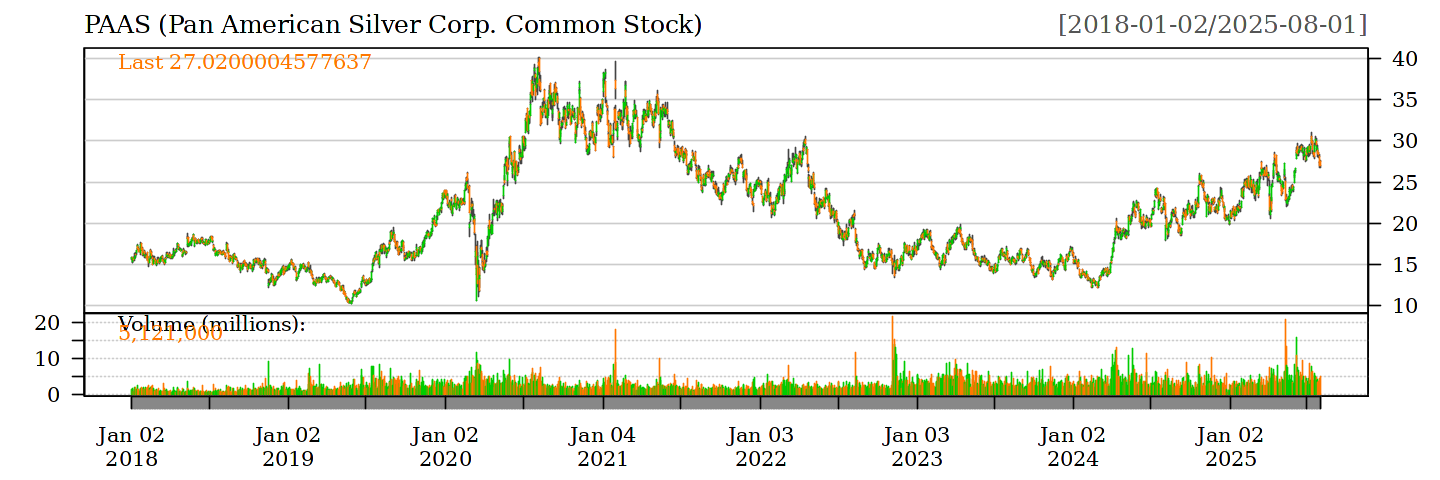

In [35]:
yahoo <- getSymbols(
    Symbol = "PAAS",
    src = "yahoo",
    from = "2018-01-01",
    auto.assign = FALSE
)

par.midr()
figsize(12, 4)
chartSeries(yahoo, theme = "white", name = "PAAS (Pan American Silver Corp. Common Stock)")

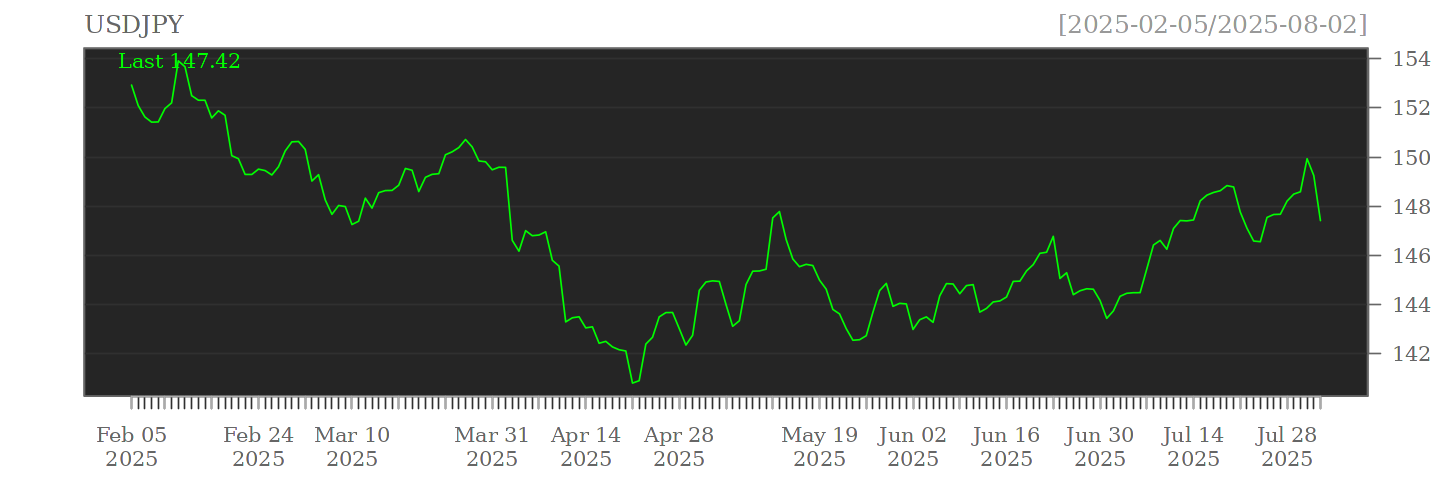

In [36]:
oanda <- getSymbols(
    Symbol = "USD/JPY",
    src = "oanda",
    auto.assign = FALSE
)
# Oanda only provides historical data for the past 180 days

par.midr()
figsize(12, 4)
chartSeries(oanda, theme = "black", name = "USDJPY")